In [1]:
import torch

In [2]:
import scipy.io as sio
from scipy.interpolate import interp1d
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import matplotlib.cm as cm

import matplotlib.ticker as ticker

import seaborn as sns



# Retrieve pickle and csv data

In [3]:
## pickle ##
import pickle

file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
filtered_data_to_tensor = pickle.load(file)
amplitude_filtereddata_to_tensor  = pickle.load(file)
peak2peak_data_to_tensor = pickle.load(file)

file.close()



In [4]:
# to retrieve ##
mt_electrodes = pd.read_csv('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_electrodes.csv')
mt_muscles= pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_muscles.csv")
unique_amplitudes=pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/unique_amplitudes.csv")

# Saving the Recruitment plots

# Recruitment curve

## All elecs for all amps

In [32]:

# Define variables for plotting
x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
print(x)
y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
print(y)
f = interp1d(x, y, axis=0,  fill_value="extrapolate")
print(f)
f2 = interp1d(x, y, kind='cubic',axis=0,  fill_value="extrapolate")
xnew = np.linspace(0, np.nanmax(amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]), num=60, endpoint=True)

tensor([0.2000,    nan, 0.5000,    nan,    nan,    nan,    nan, 1.1000,    nan,
           nan,    nan,    nan, 1.6000, 1.7000,    nan, 1.9000,    nan,    nan,
        2.2000,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan])
tensor([0.0001,    nan, 0.0001,    nan,    nan,    nan,    nan, 0.0002,    nan,
           nan,    nan,    nan, 0.0004, 0.0003,    nan, 0.0006,    nan,    nan,
        0.0007,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan])


### Recruitment per elec without interpol1

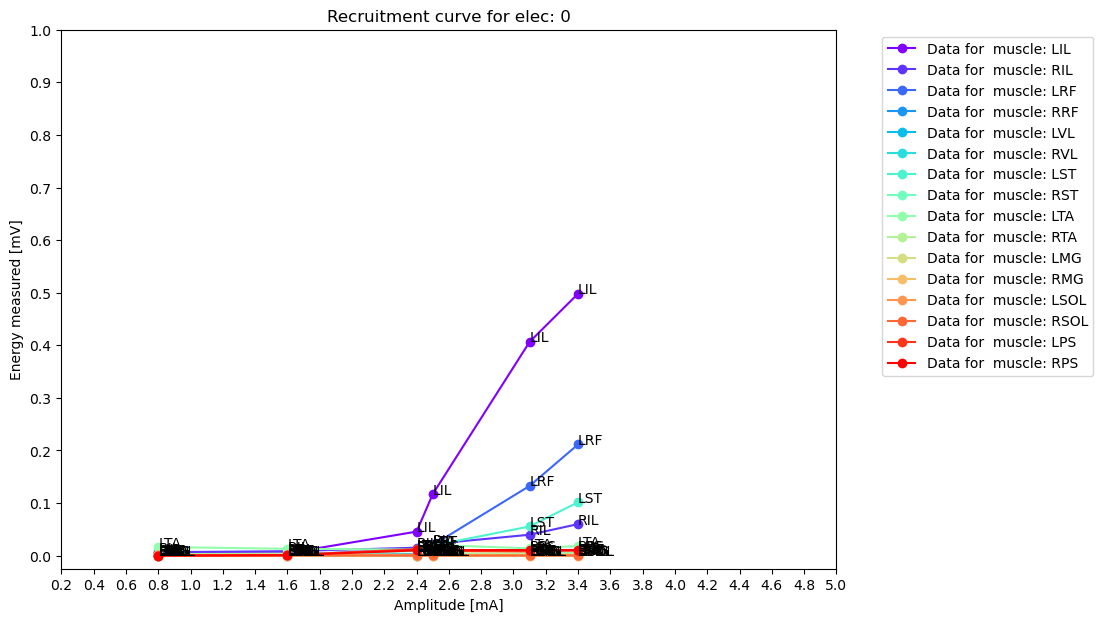

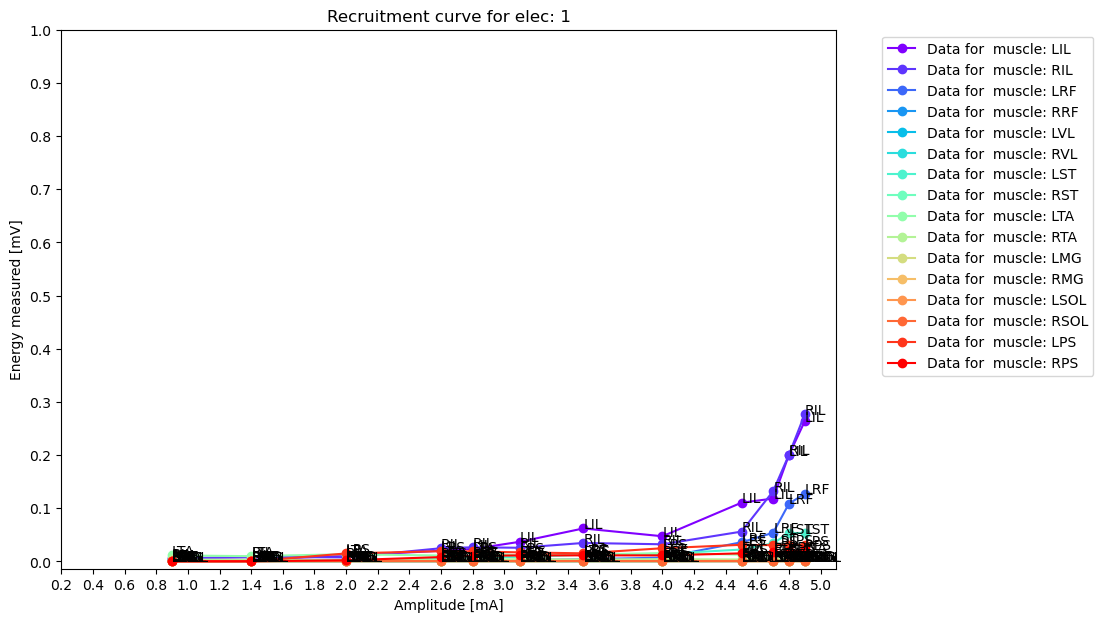

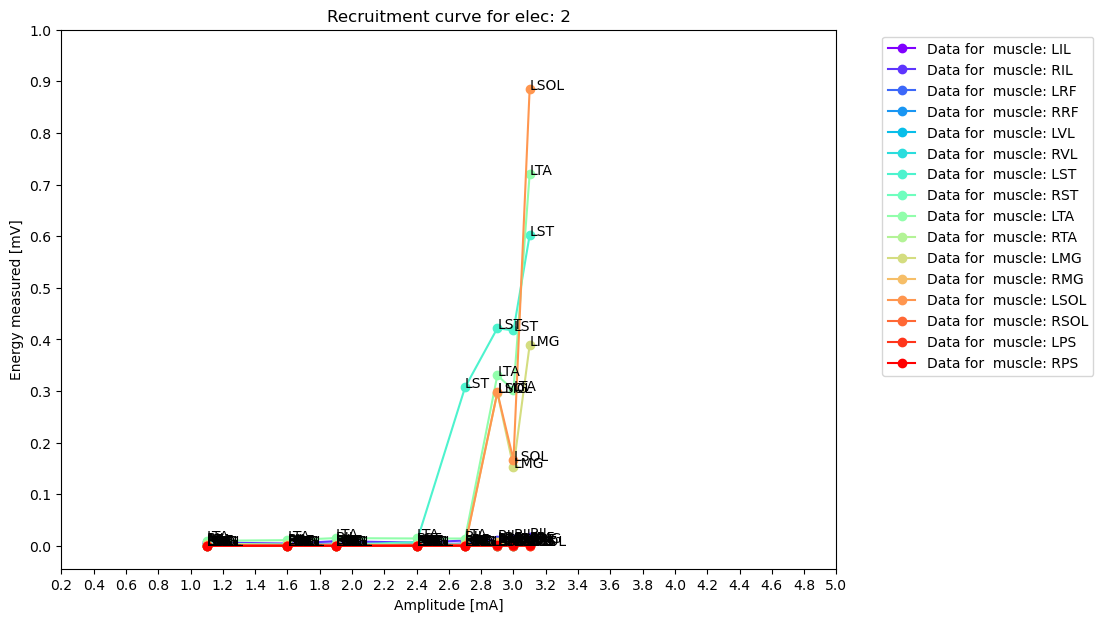

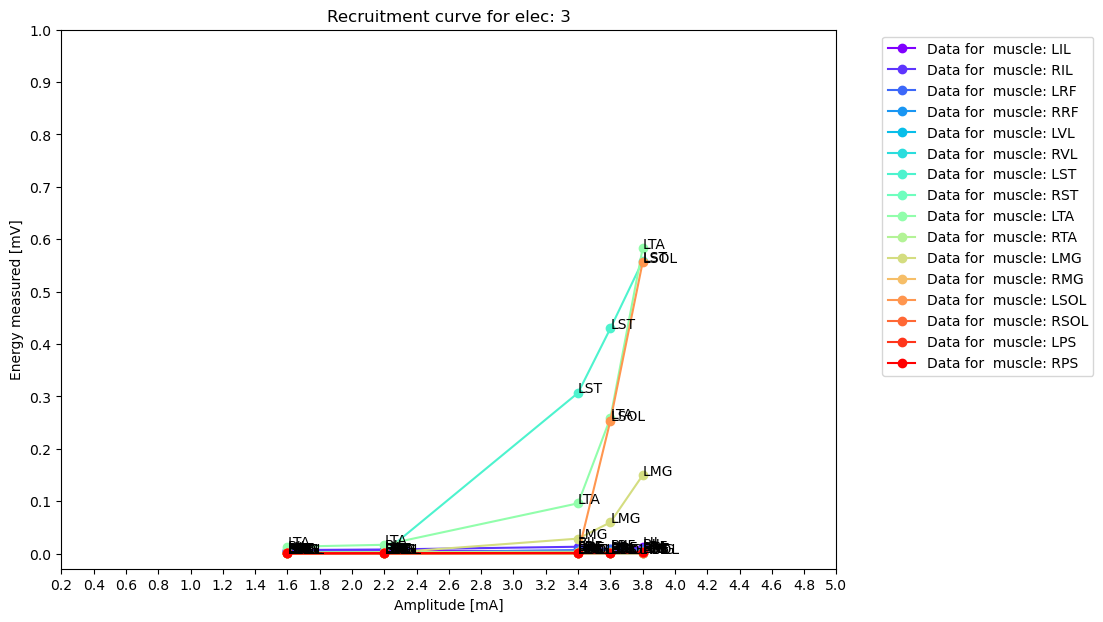

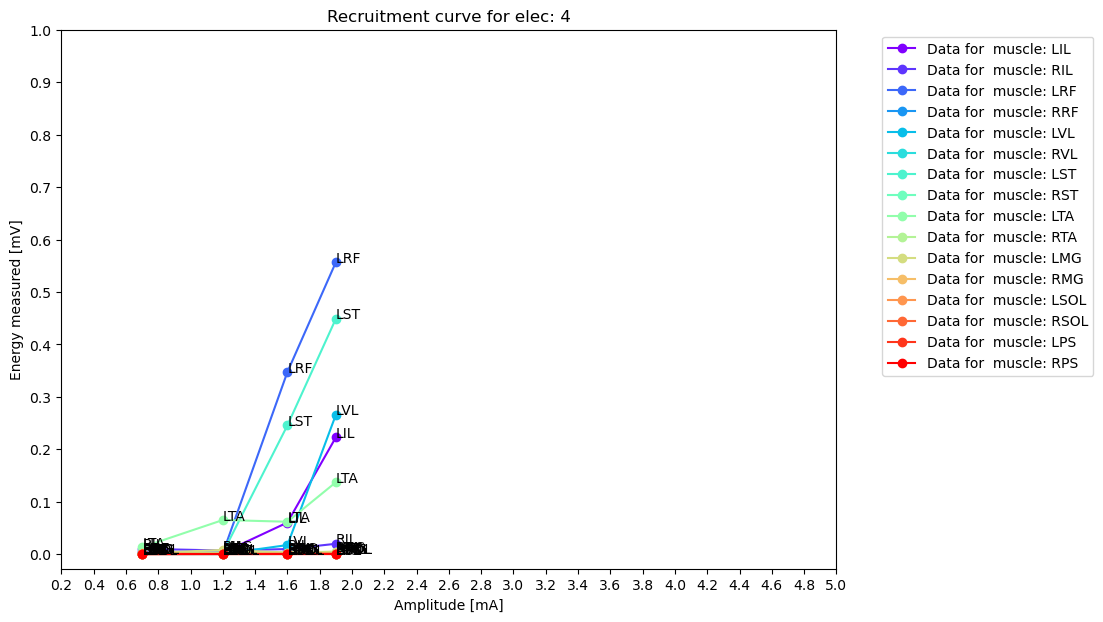

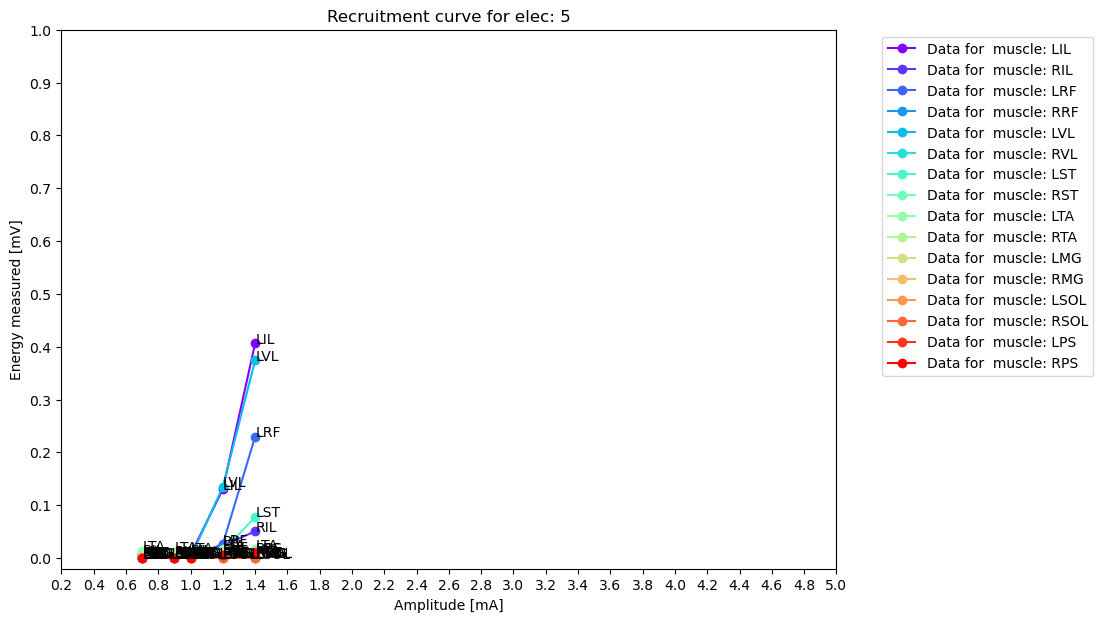

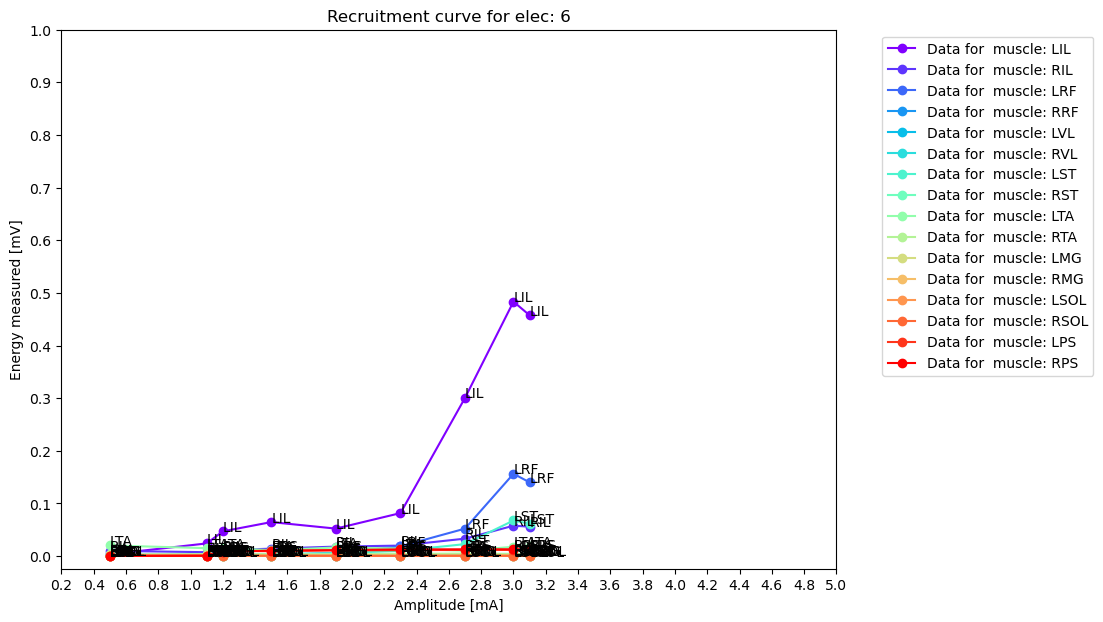

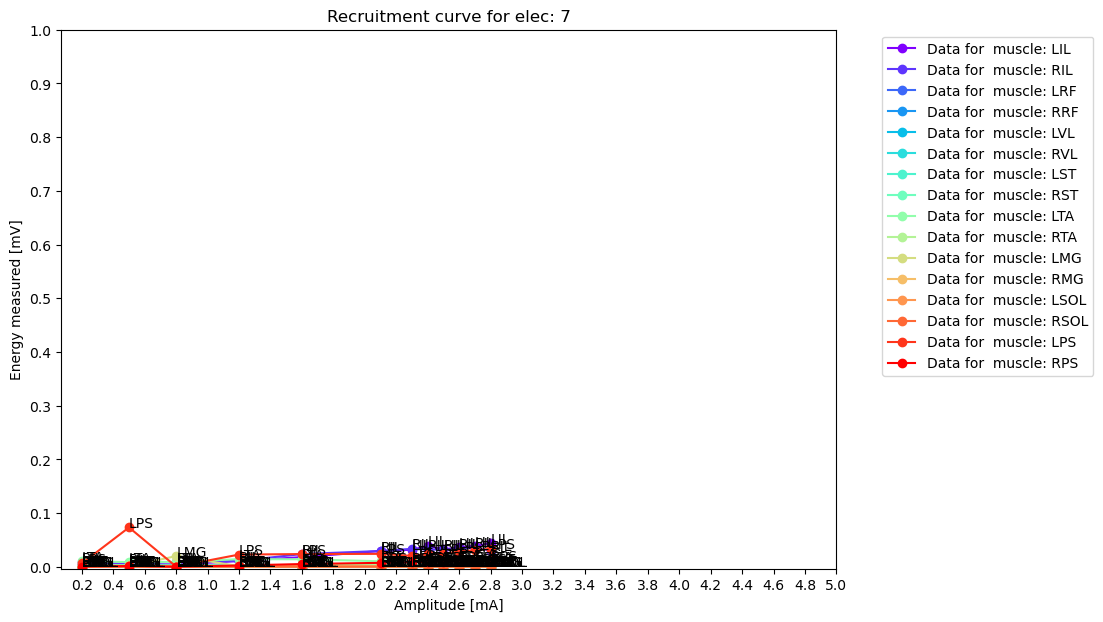

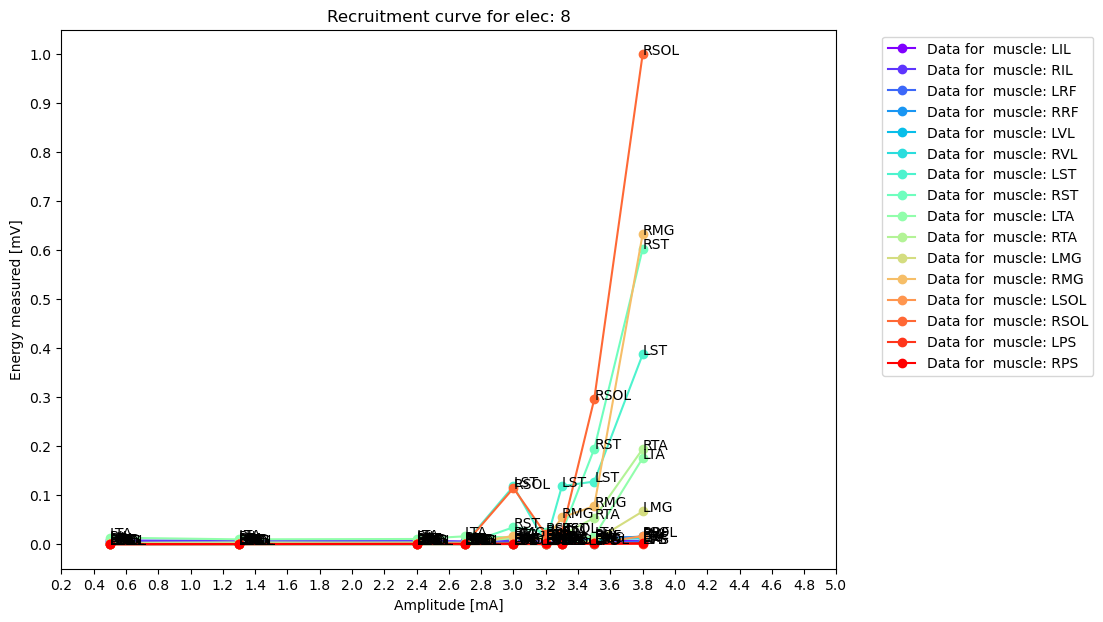

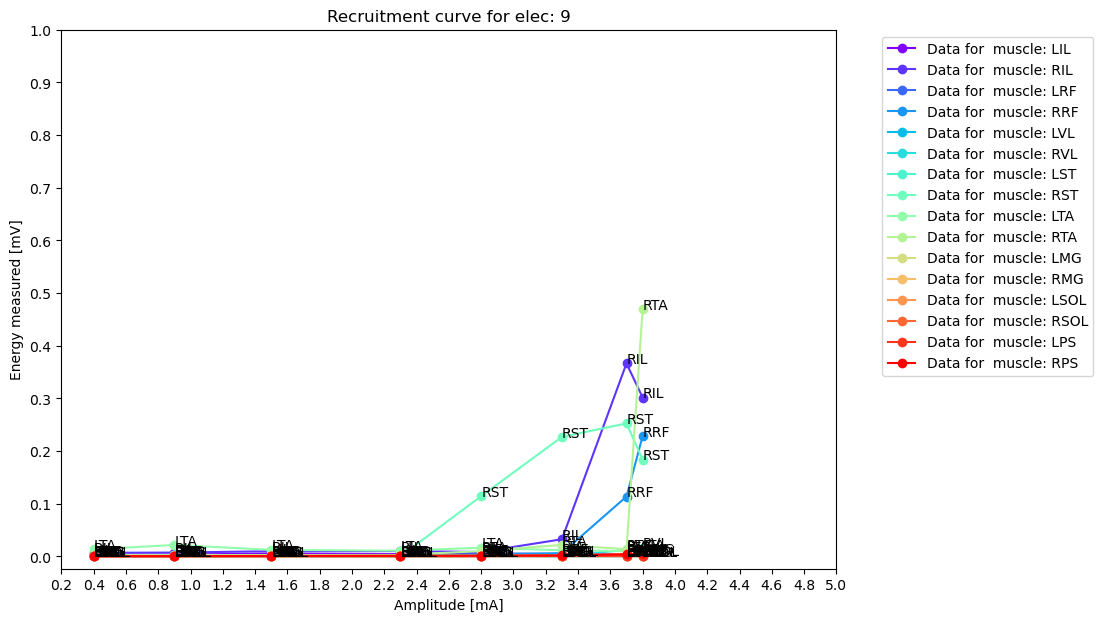

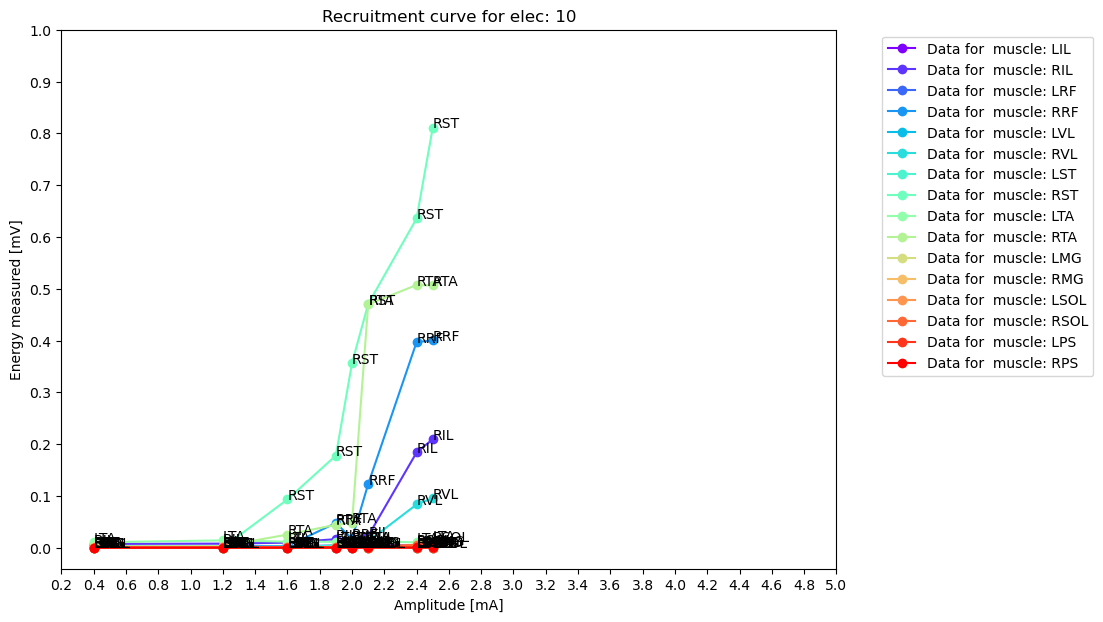

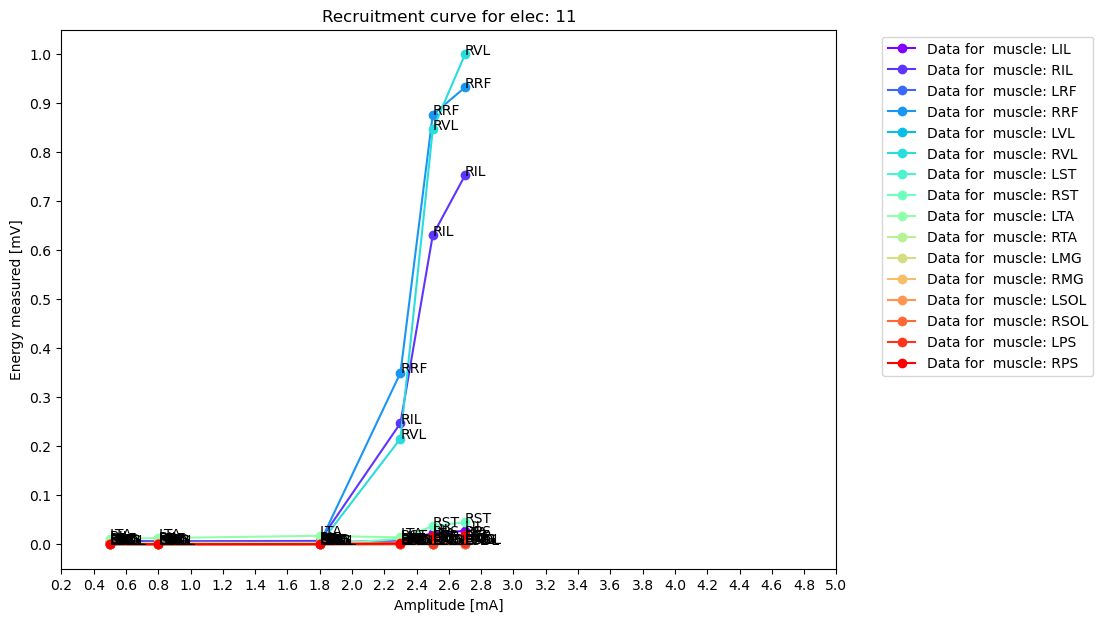

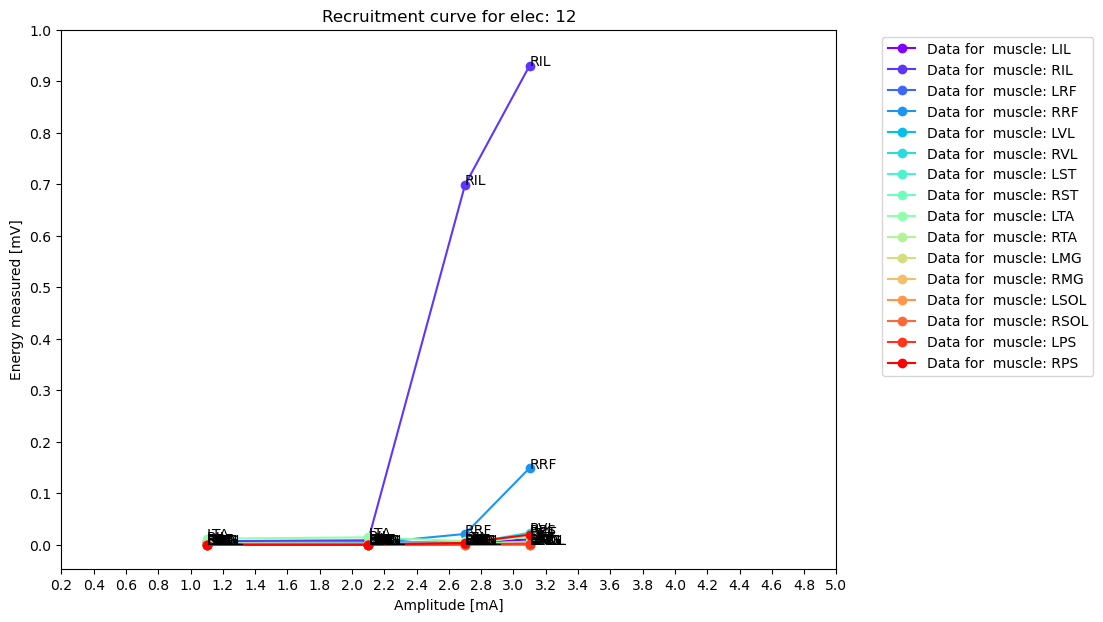

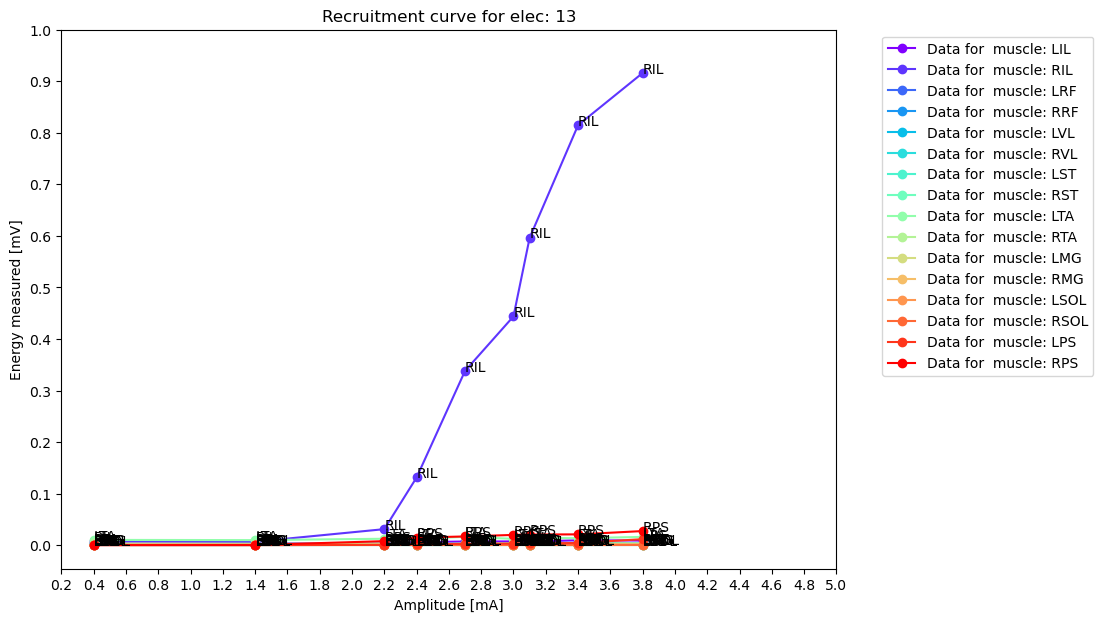

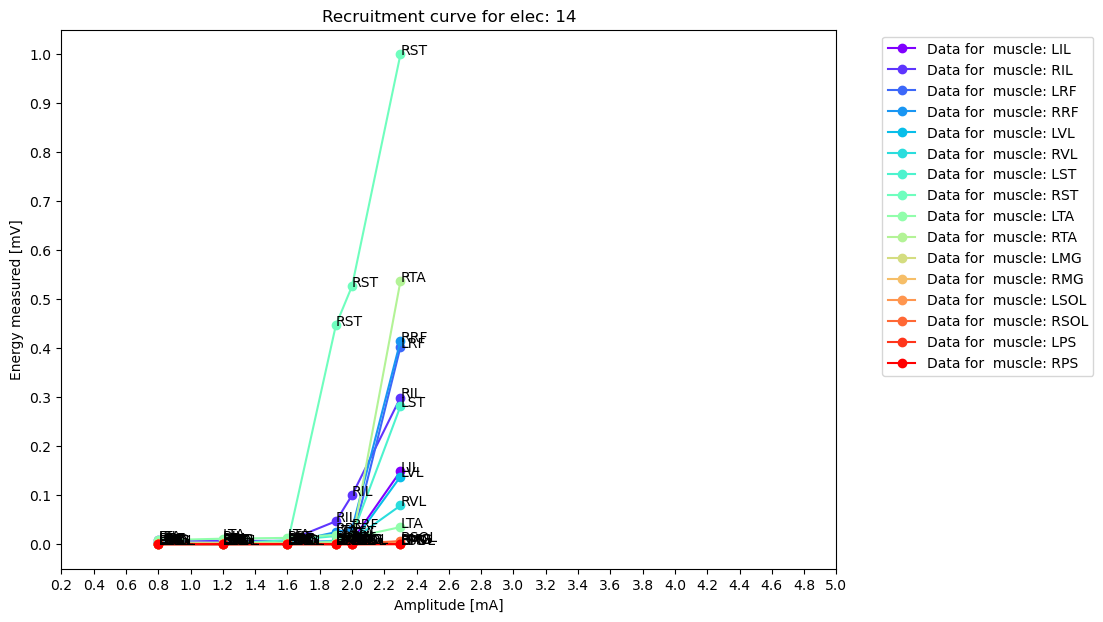

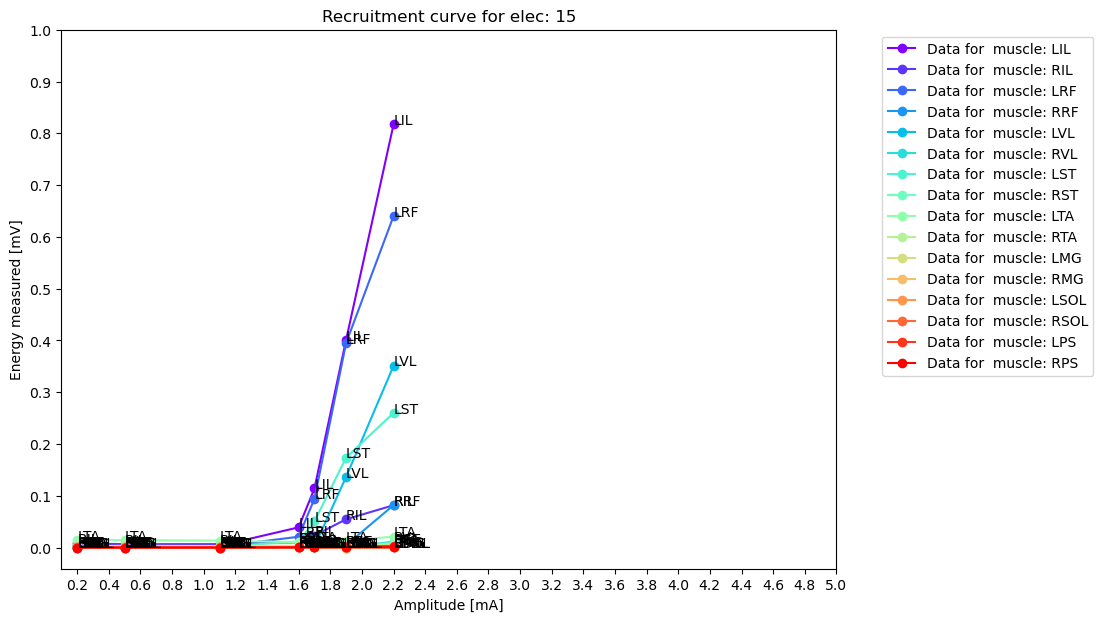

In [37]:
# Original, got rid of interpl1, since not as accurate as the default interpolation

colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
label=mt_muscles["muscle_name"]

for elec_i in range (0, len(mt_electrodes)):
  fig, ax = plt.subplots(figsize=(10,7))
  for muscle_i in range (len(mt_muscles)):

    # Define variables for plotting
    x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
    y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
 
    
    # Remove nan values
    x_without_nan=np.array(x)
    x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
    y_without_nan=np.array(y)
    y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

    # Plot the data points
    plt.plot(x_without_nan,  y_without_nan, 'o-', c=colors[muscle_i], label= f"Data for  muscle: {mt_muscles['muscle_name'][muscle_i]}") 
    
    # Add text descripiton to the points for visibility
    for index in range (len(x_without_nan)):
        ax.text(x_without_nan[index], y_without_nan[index], label[muscle_i], size=10) 
    
    
    # Set label and scale
    ax.set_xlabel("Amplitude [mA]")
    ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

 # Plotting settings
  ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.set_title(f"Recruitment curve for elec: {elec_i}")

  # save plots
  if save_flag:
      data_file = "elec"+"_"+str(elec_i)+"_"+"recruitment_curve"+'.png'
      data_file_path = os.path.join(save_folder,data_file)
      plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
  plt.show()


### with interpol 1

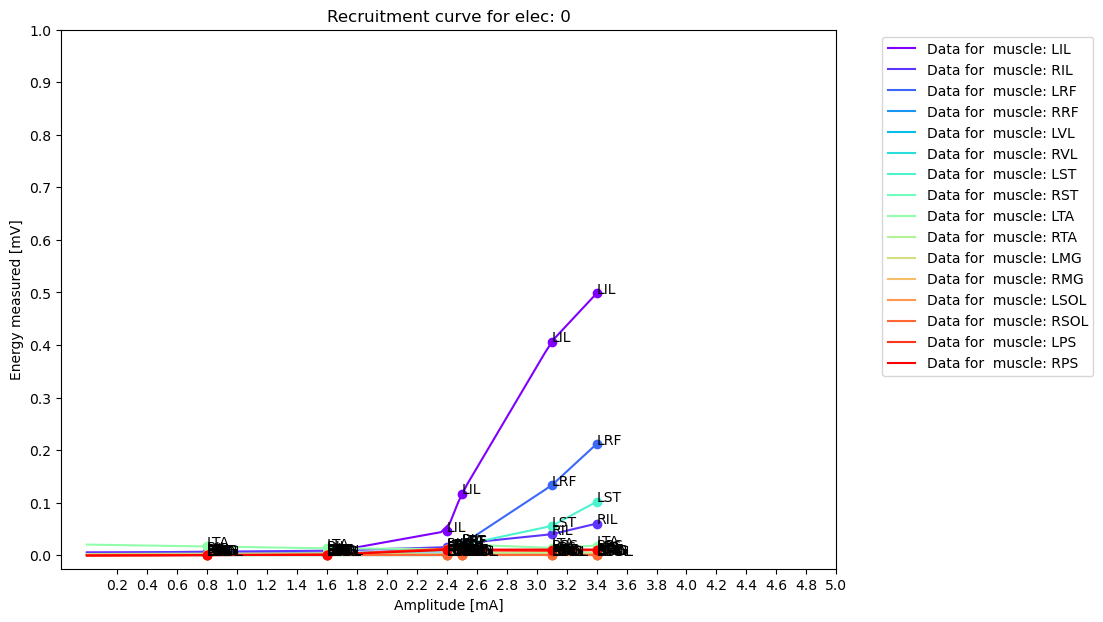

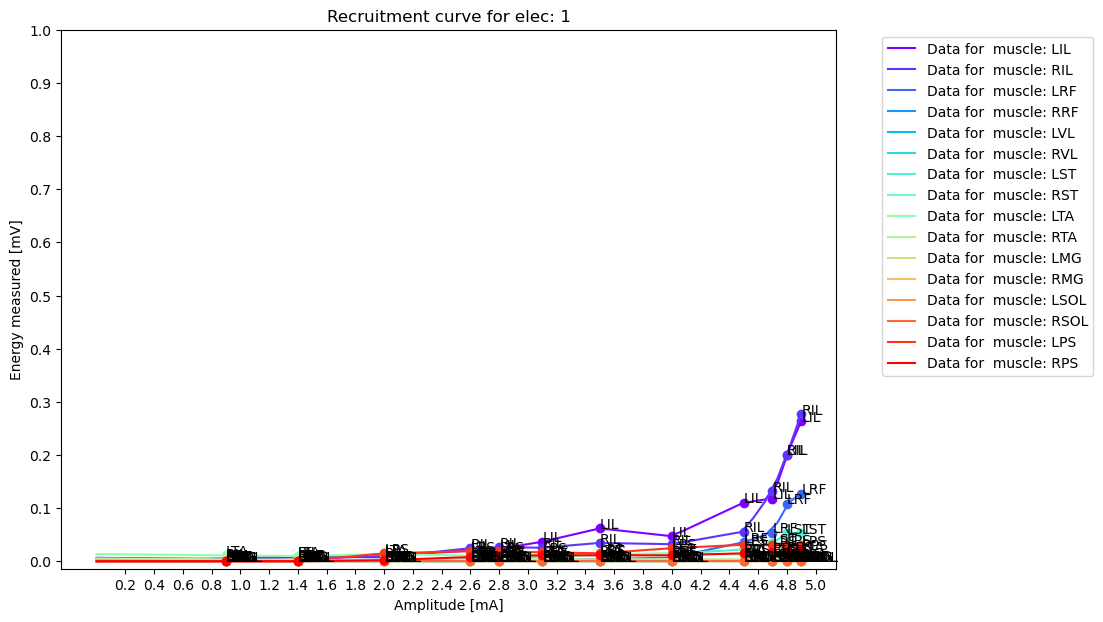

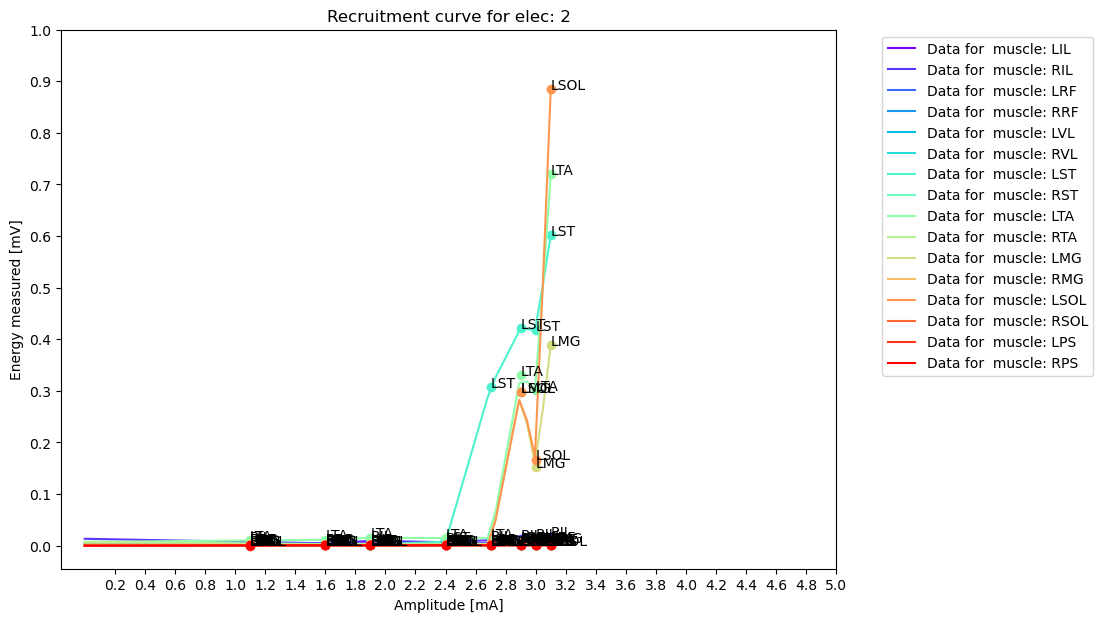

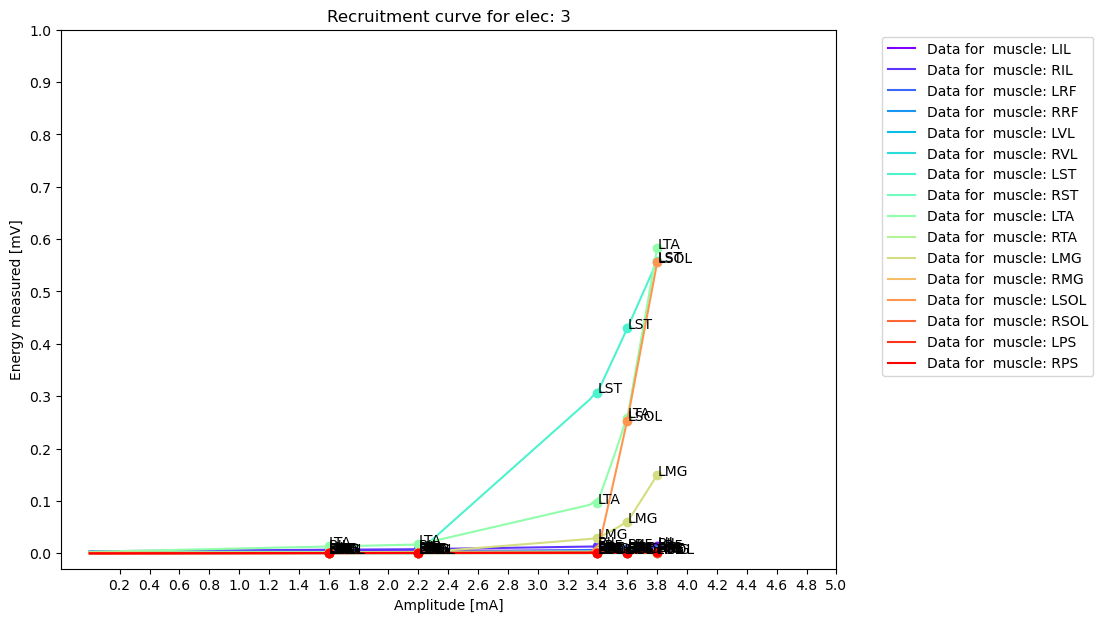

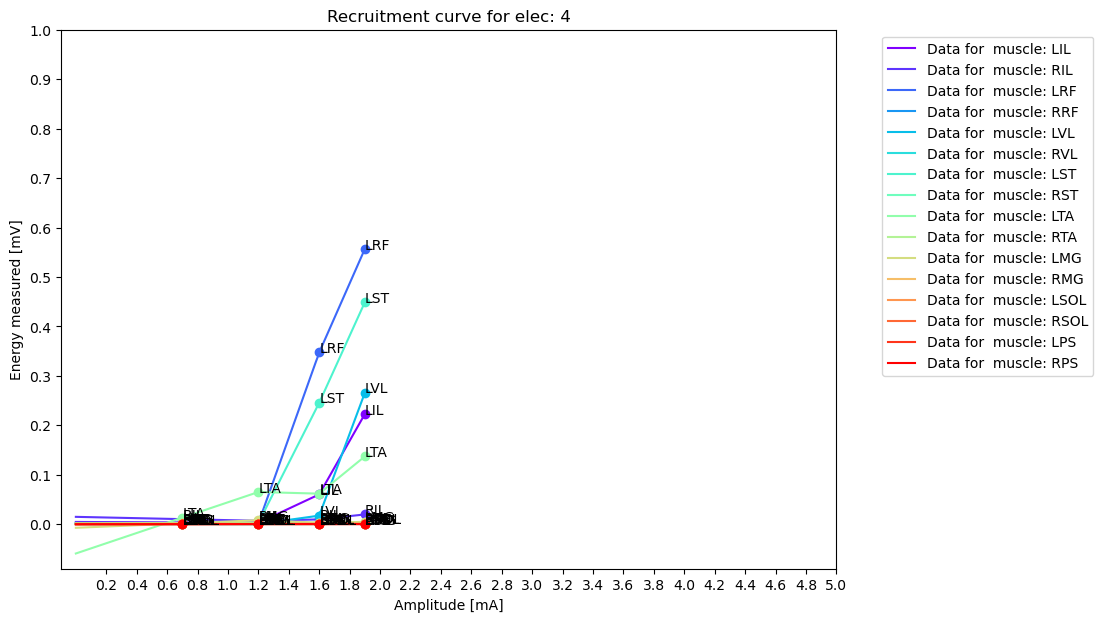

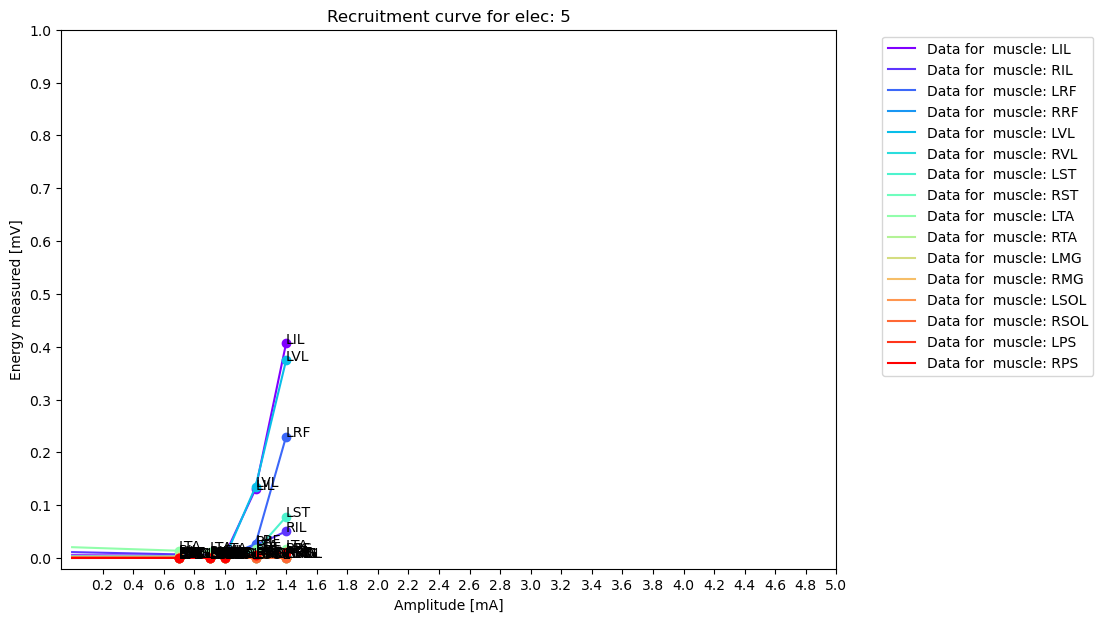

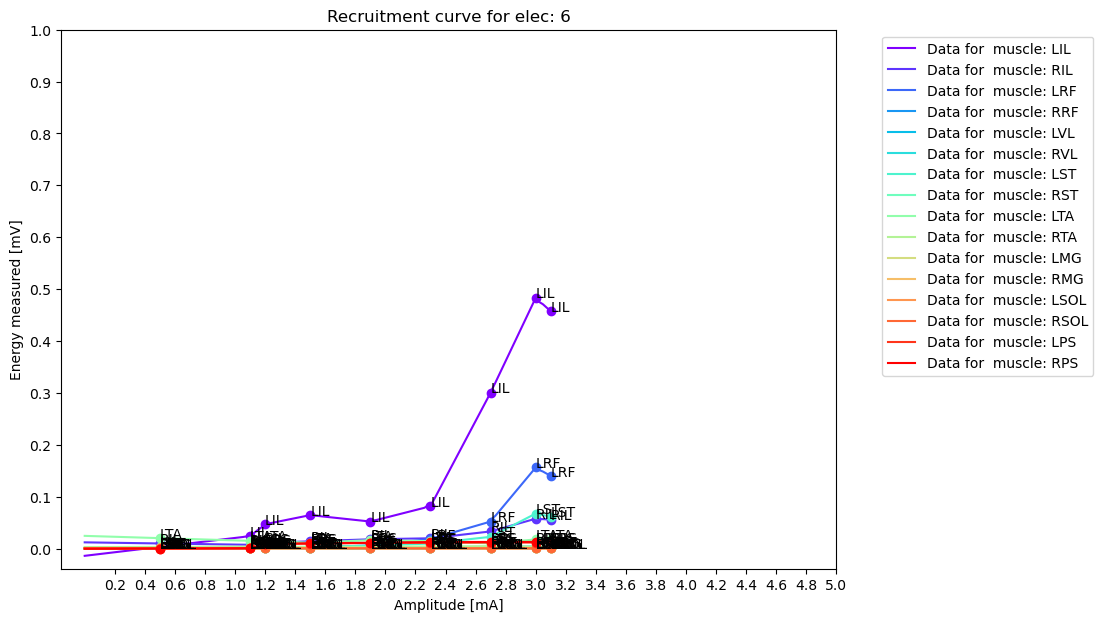

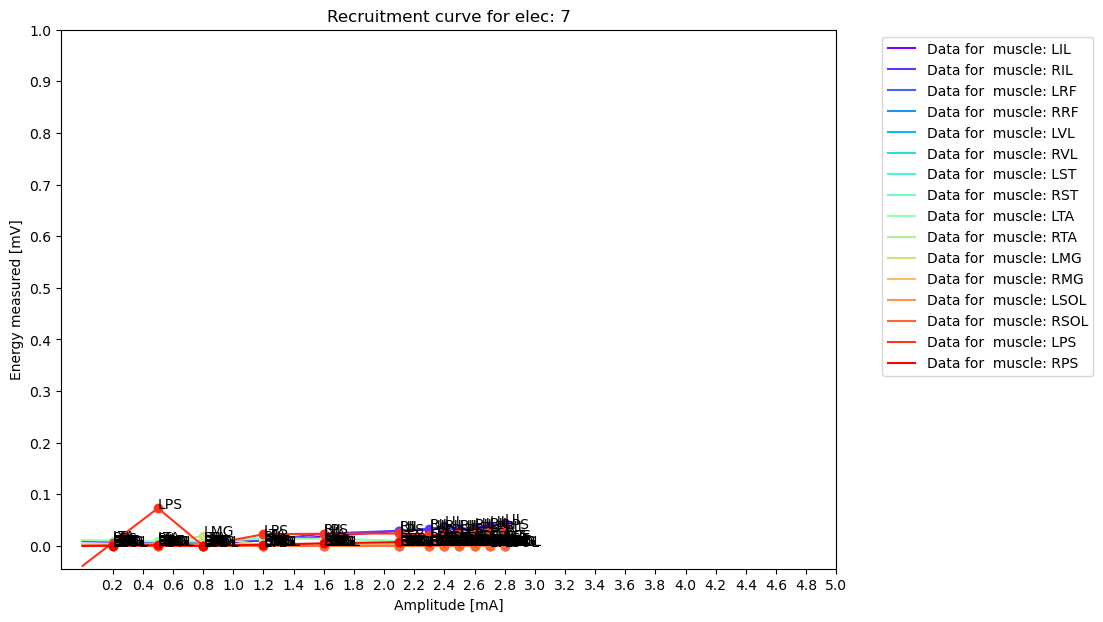

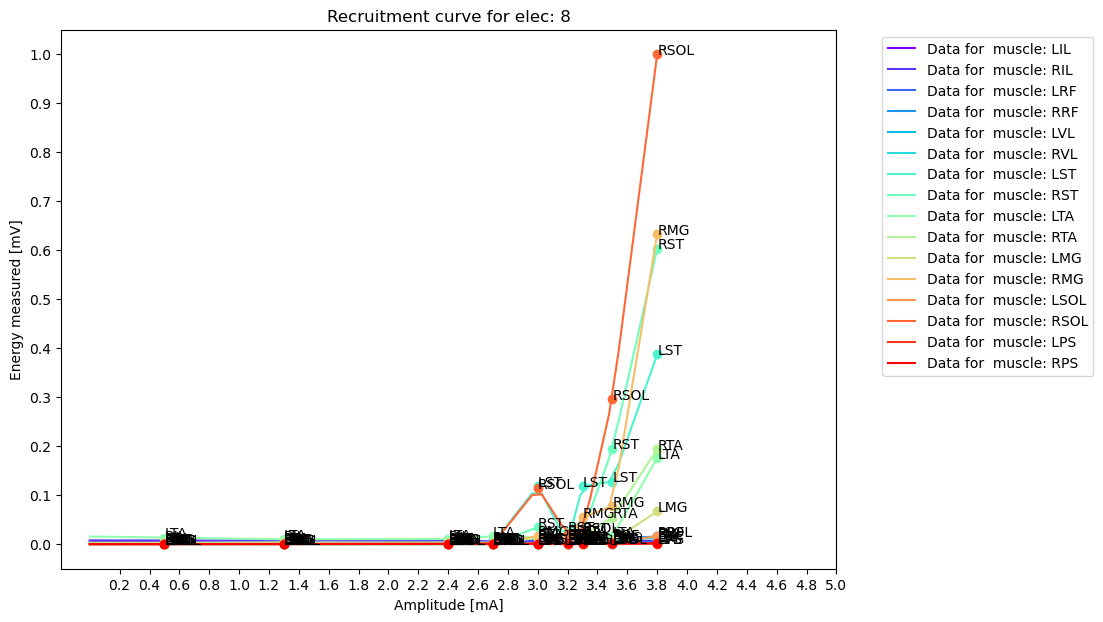

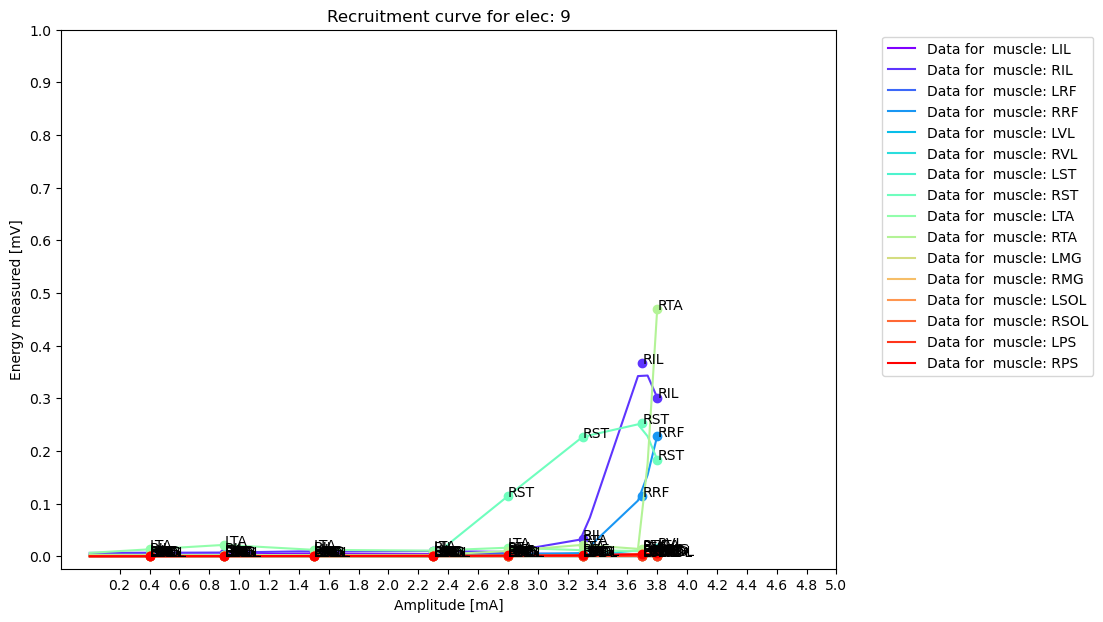

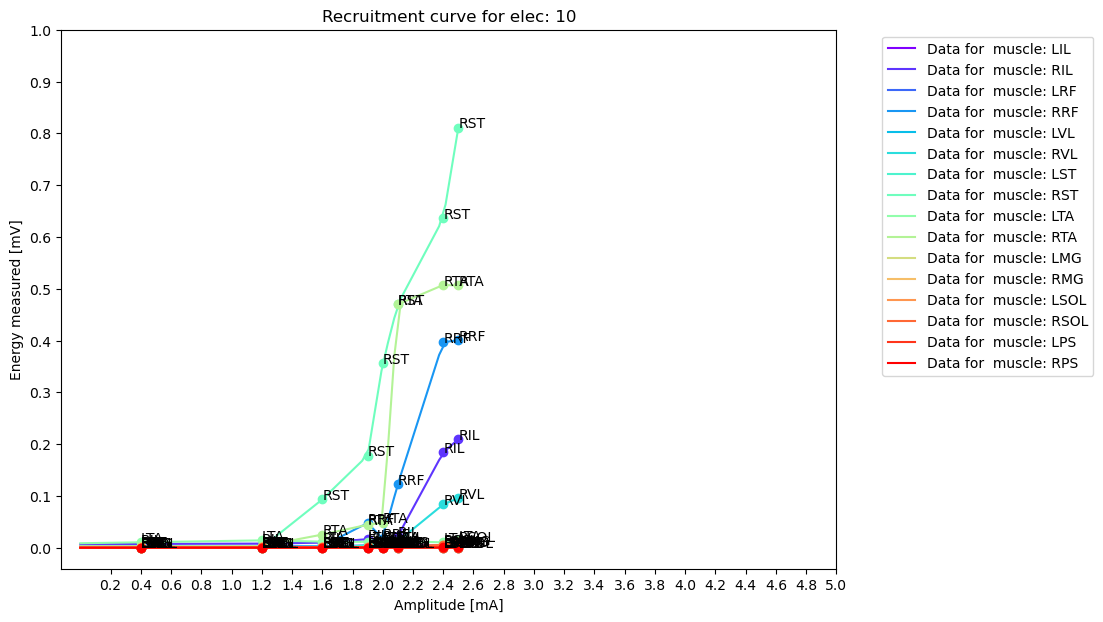

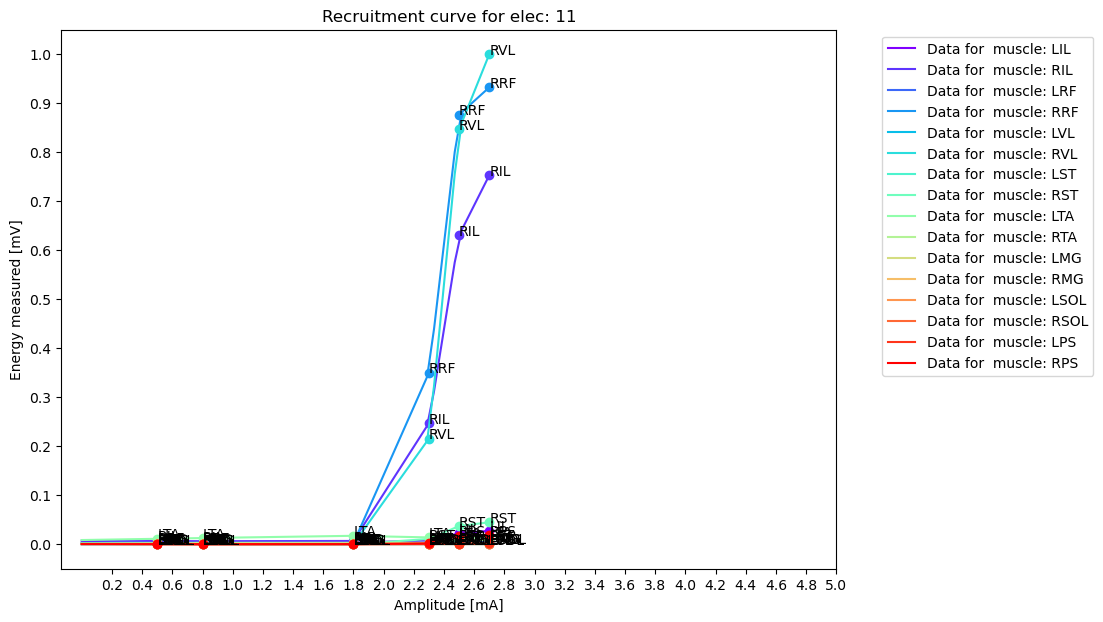

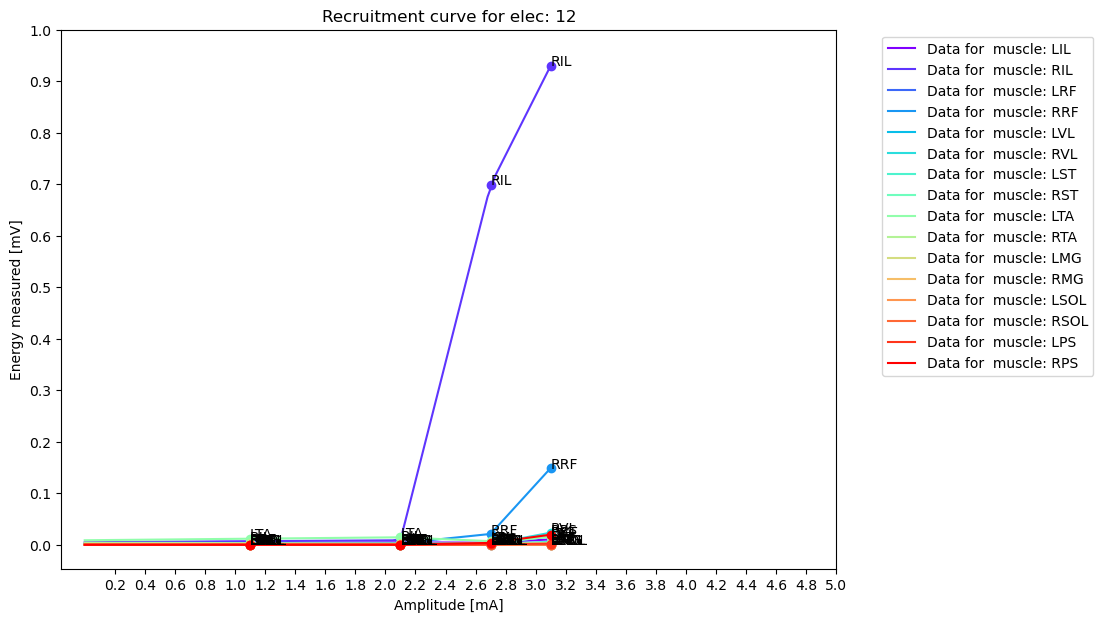

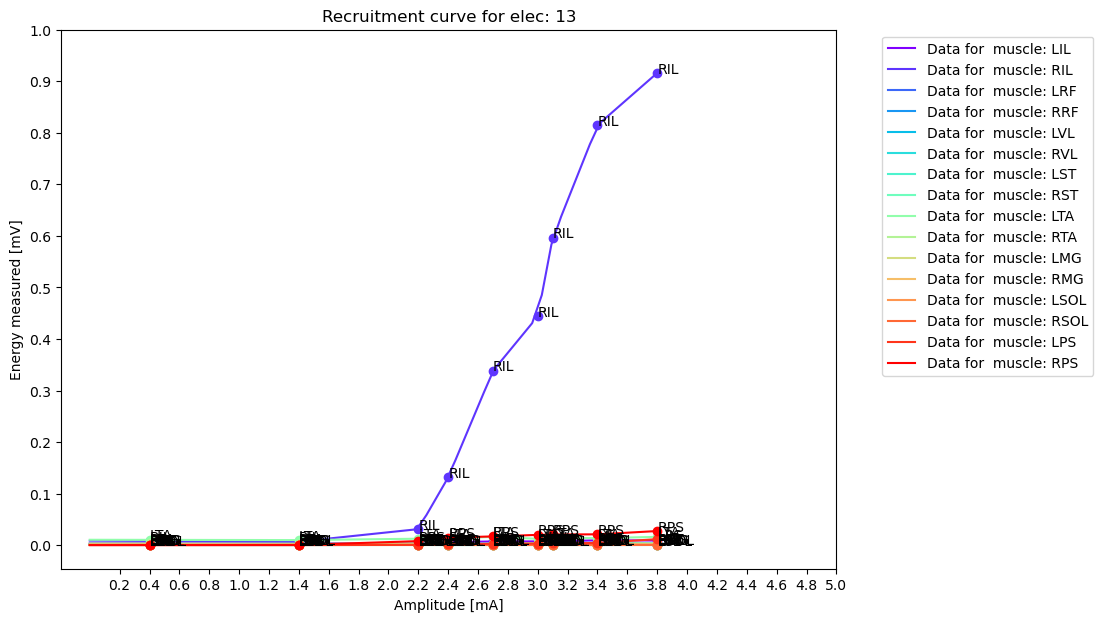

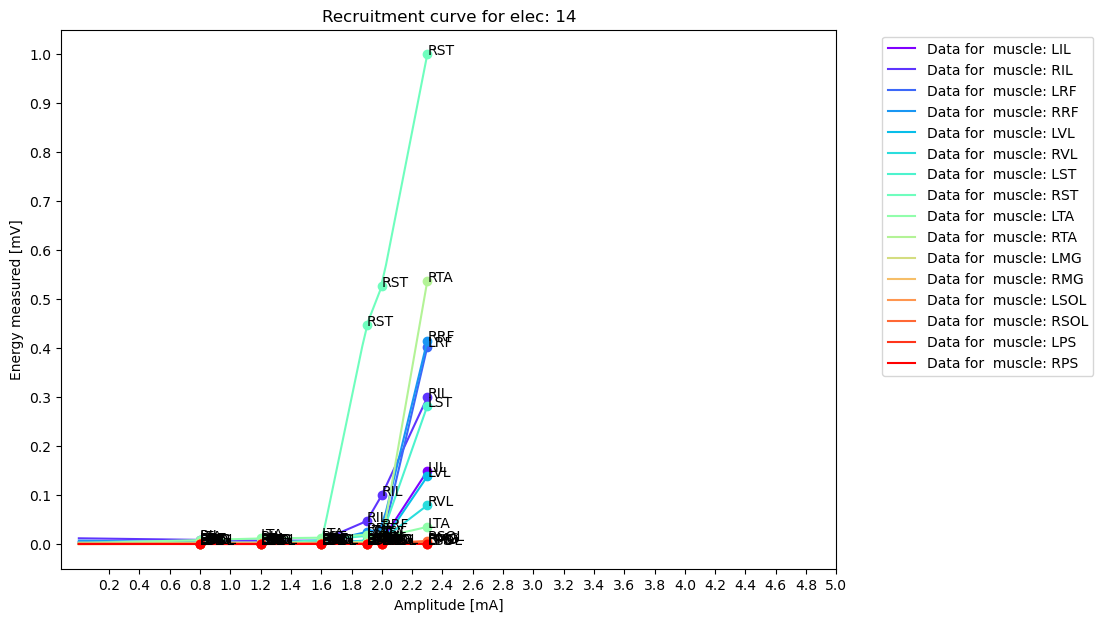

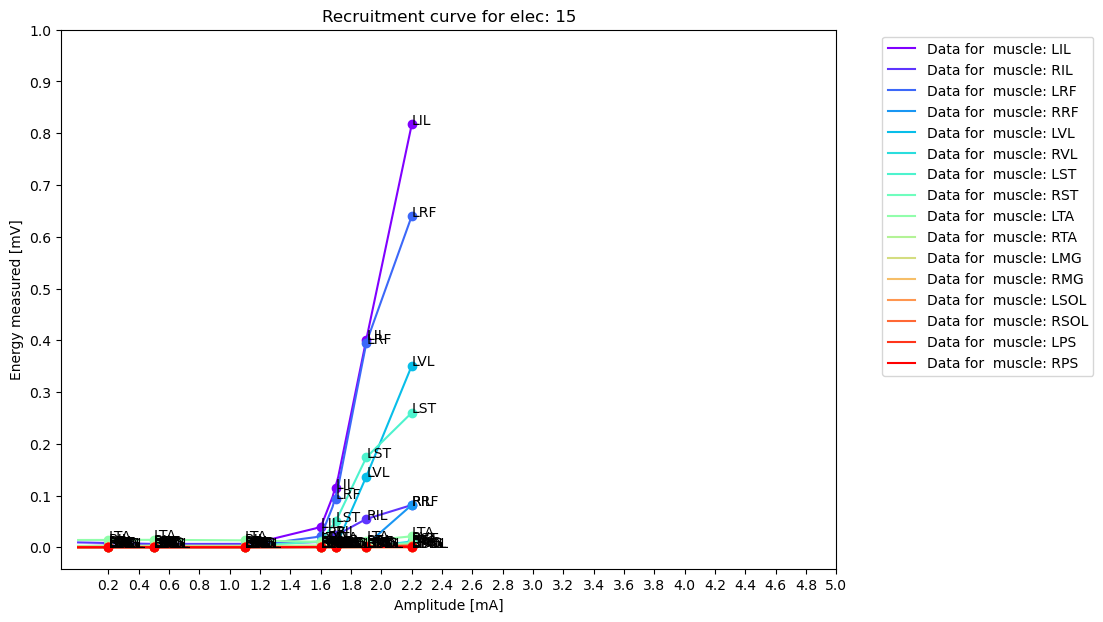

In [ ]:
# Final version linear interpolation ( use intrpl1 since amplitudes are given but )

colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
label=mt_muscles["muscle_name"]

for elec_i in range (0, len(mt_electrodes)):
  fig, ax = plt.subplots(figsize=(10,7))
  for muscle_i in range (len(mt_muscles)):

    # Define variables for plotting
    x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
    y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
    f = interp1d(x, y, axis=0,  fill_value="extrapolate")
    f2 = interp1d(x, y, kind='cubic',axis=0,  fill_value="extrapolate")
    xnew = np.linspace(0, np.nanmax(amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]), num=60, endpoint=True)
    
    # Remove nan values for the text index
    x_without_nan=np.array(x)
    x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
    y_without_nan=np.array(y)
    y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

    # Plot the data points
    plt.plot(x, y, 'o', c=colors[muscle_i]) 
    
    # Add text descripiton to the points for visibility
    for index in range (len(x_without_nan)):
        ax.text(x_without_nan[index], y_without_nan[index], label[muscle_i], size=10) 
    
    # Plot the interpolation of data points to see trend
    plt.plot(xnew, f(xnew), '-', c=colors[muscle_i], label= f"Data for  muscle: {mt_muscles['muscle_name'][muscle_i]}")
    
    # Set label and scale
    ax.set_xlabel("Amplitude [mA]")
    # ax.set_xticks(ticks=list(unique_amplitudes["amplitudes"]))
    ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

 # Plotting settings
  ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.set_title(f"Recruitment curve for elec: {elec_i}")

  # save plots
  # if save_flag:
  #     data_file = "elec"+"_"+str(elec_i)+"_"+"recruitment_curve"+'.png'
  #     data_file_path = os.path.join(save_folder,data_file)
  #     plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
  plt.show()


### Recruitment per elec without interpol1

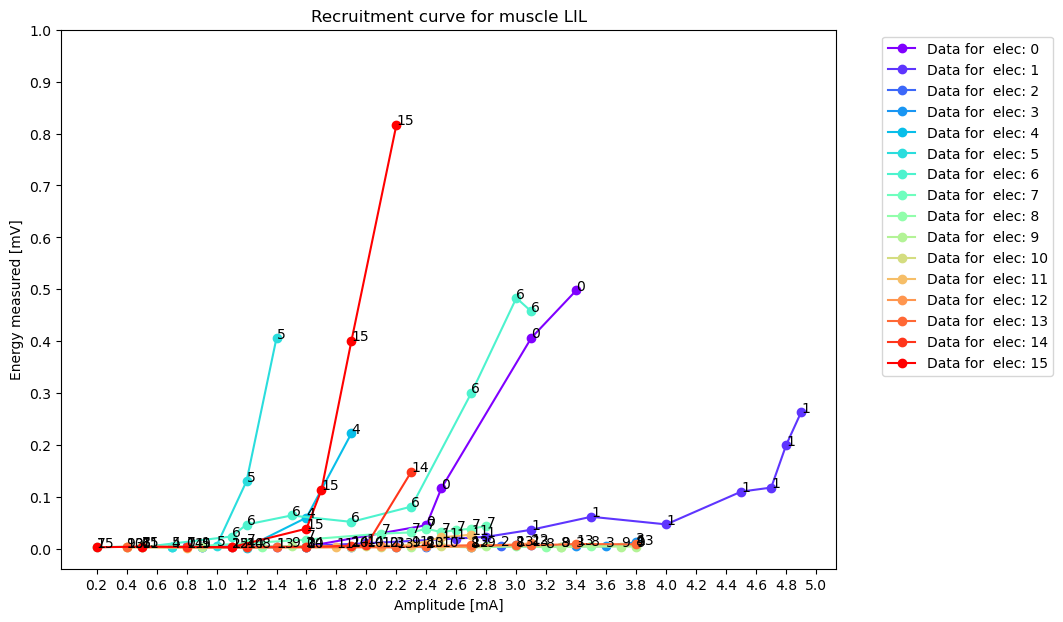

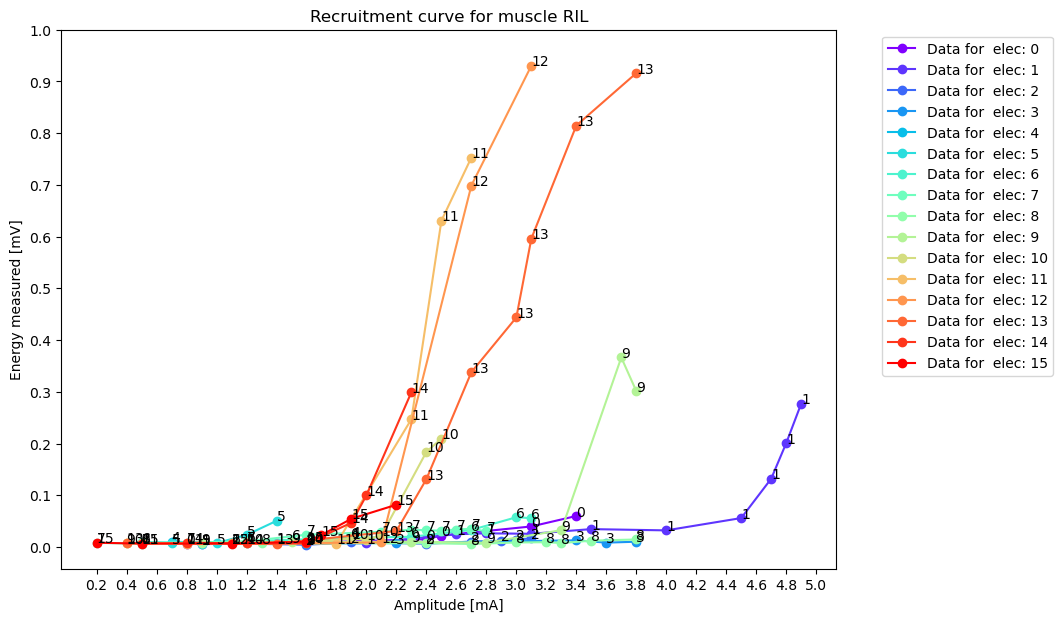

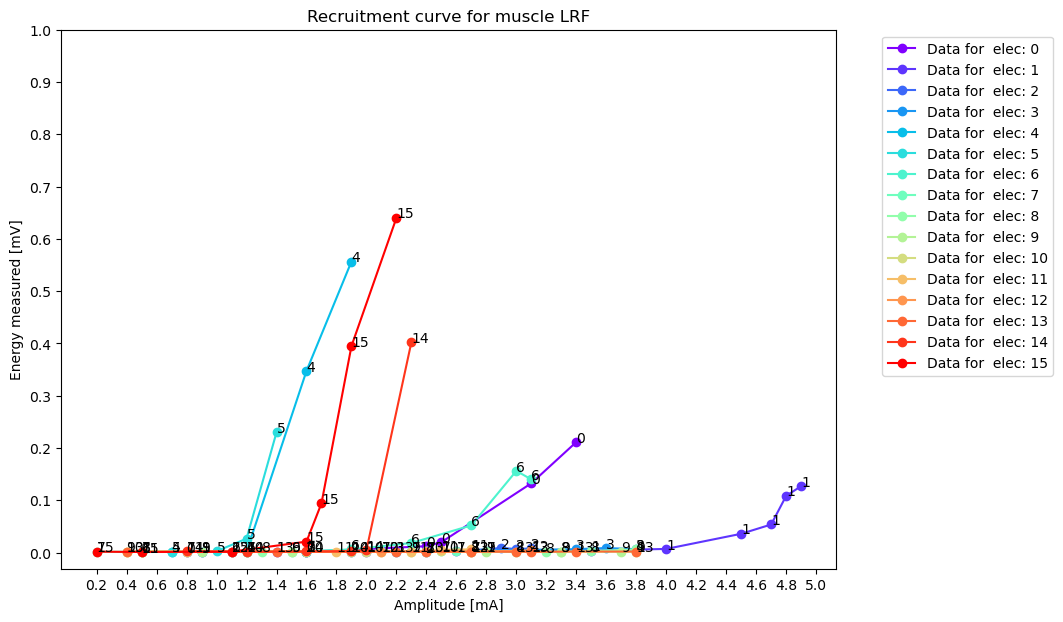

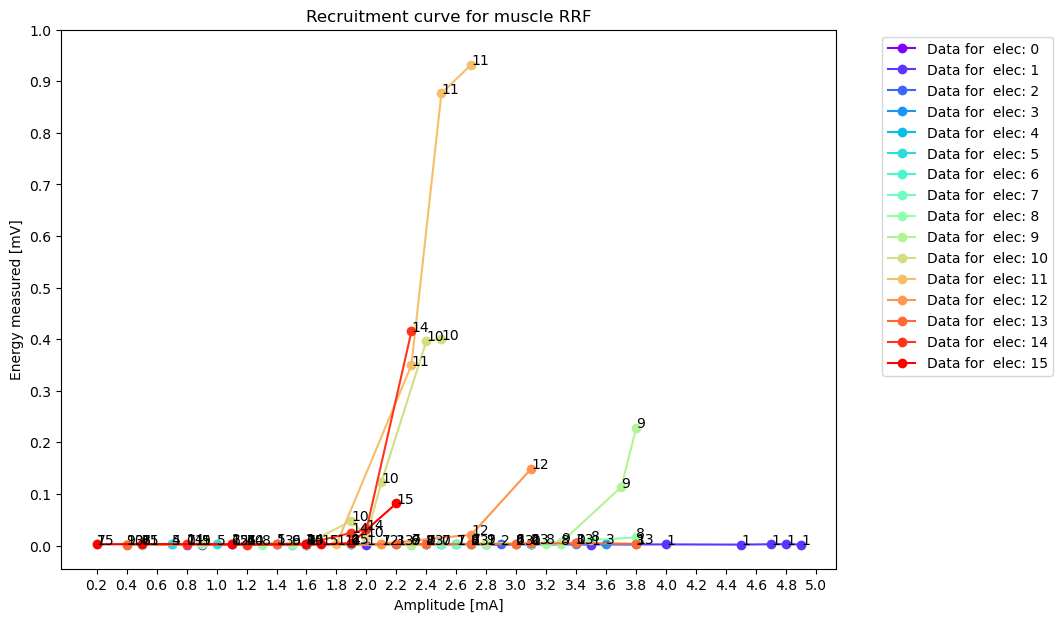

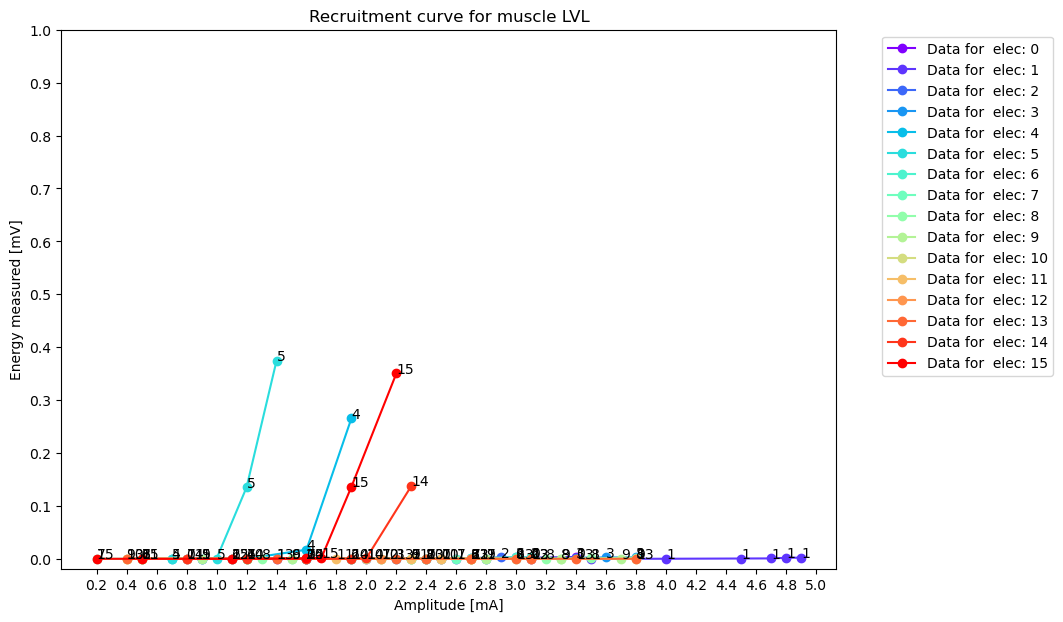

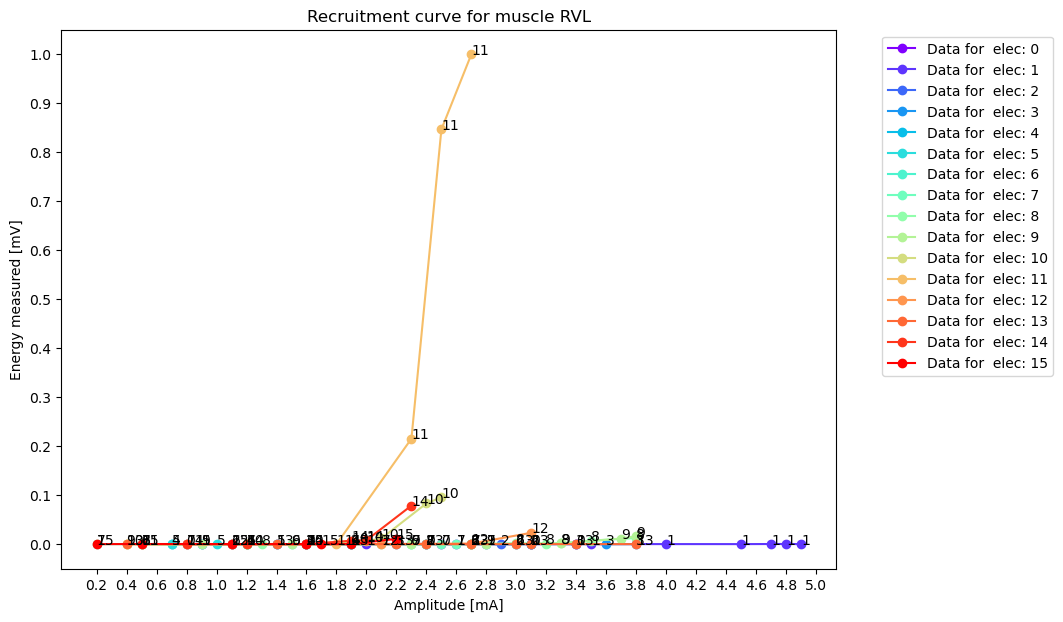

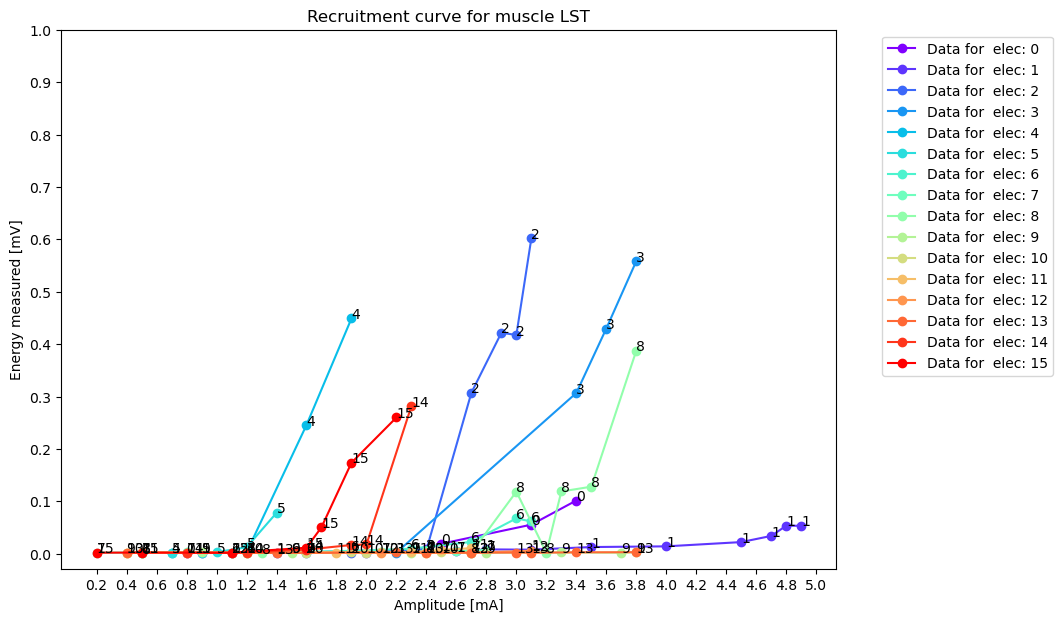

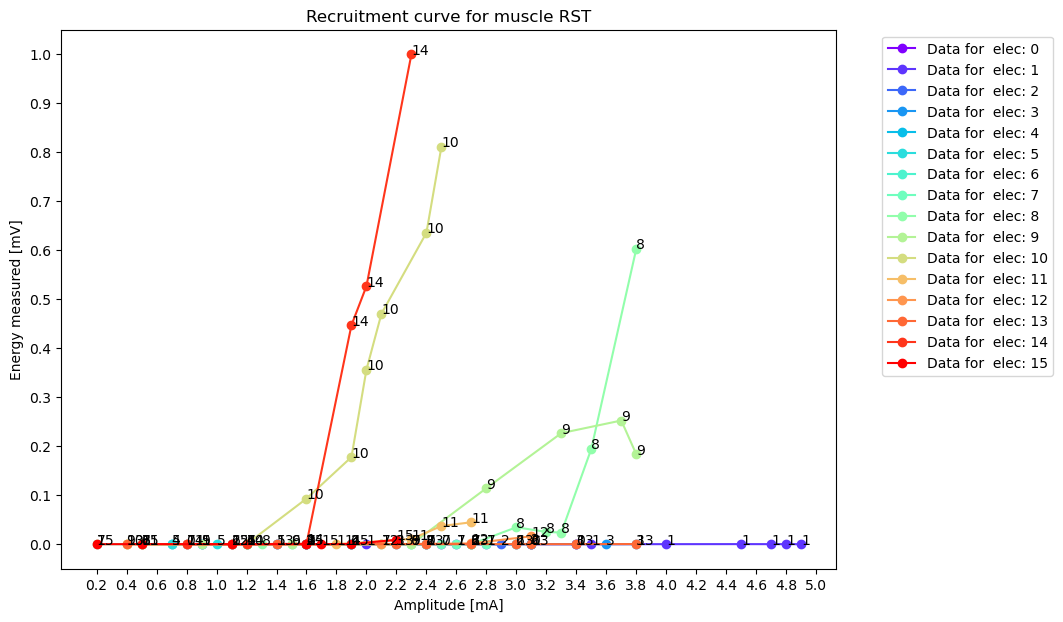

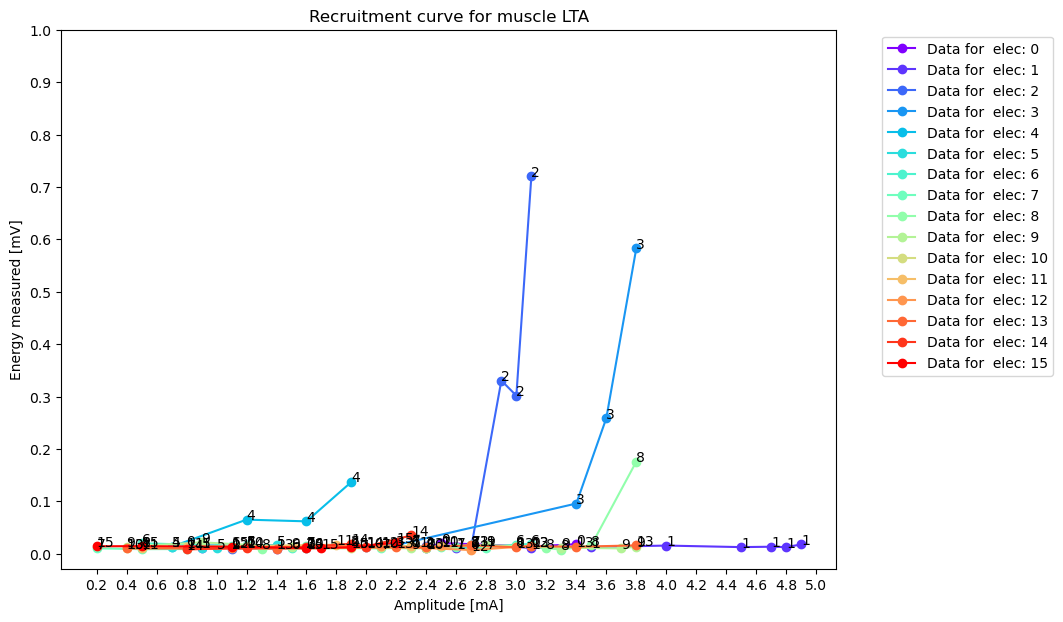

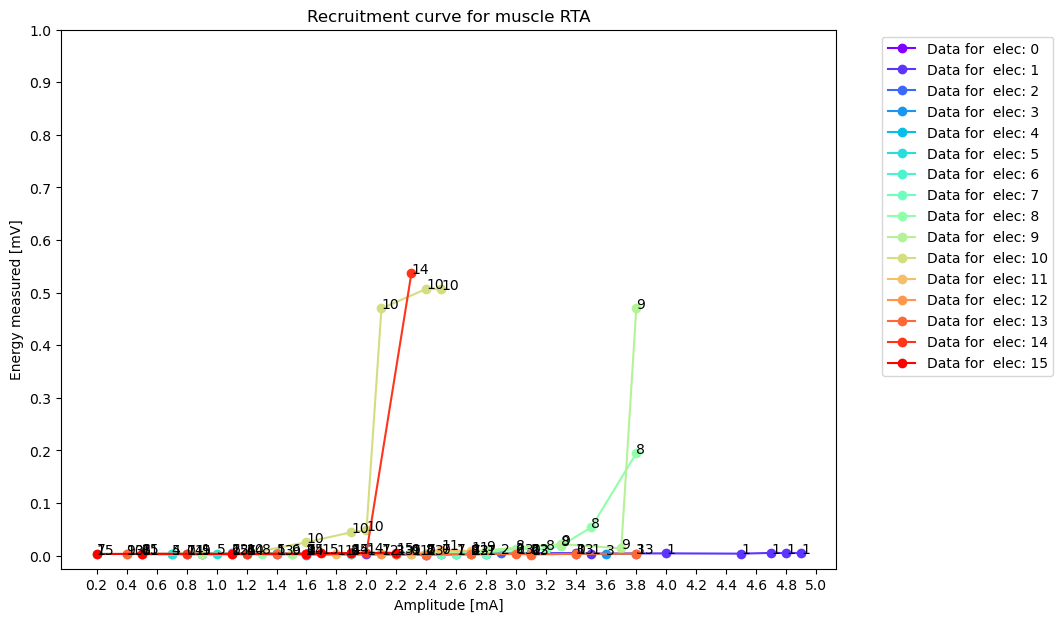

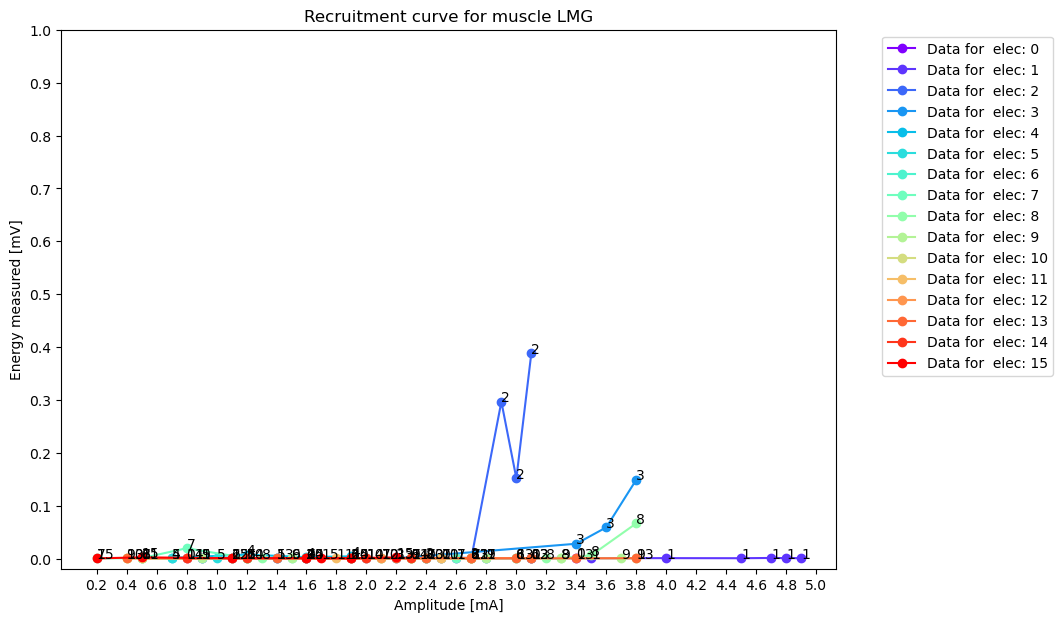

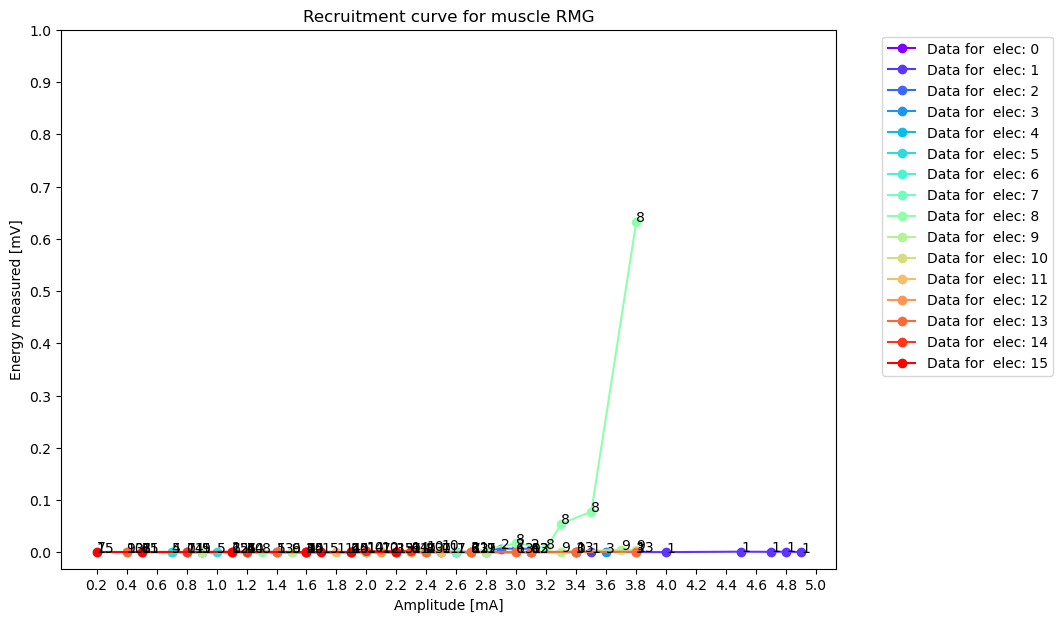

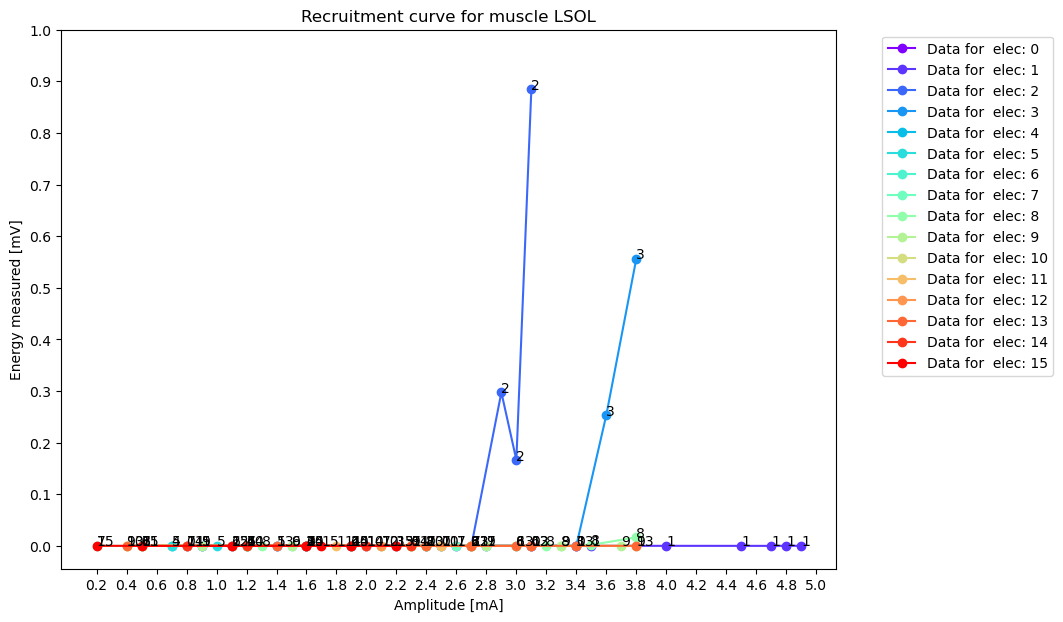

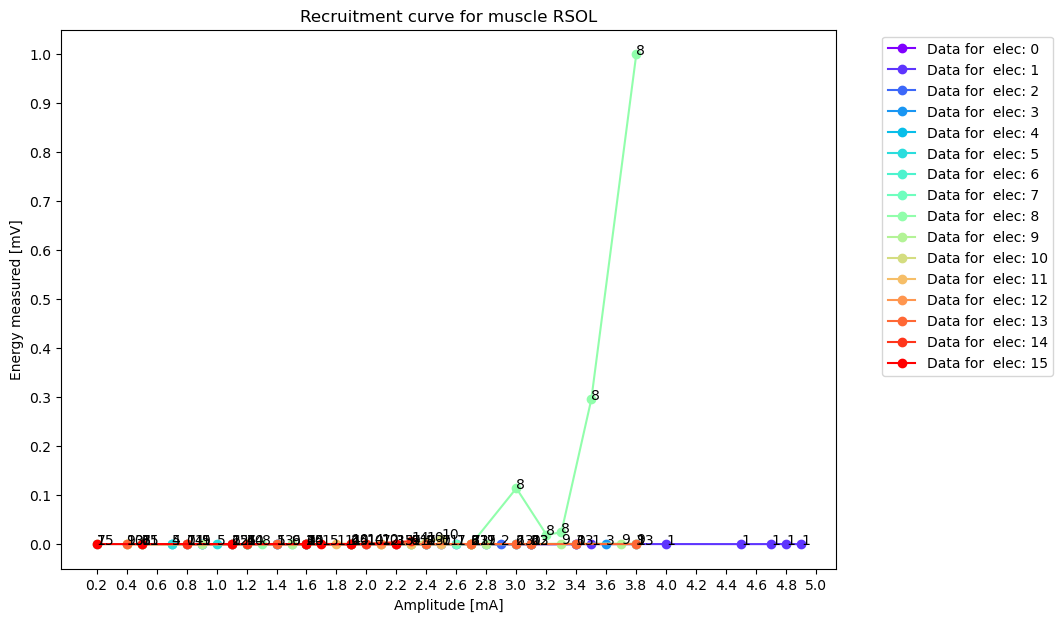

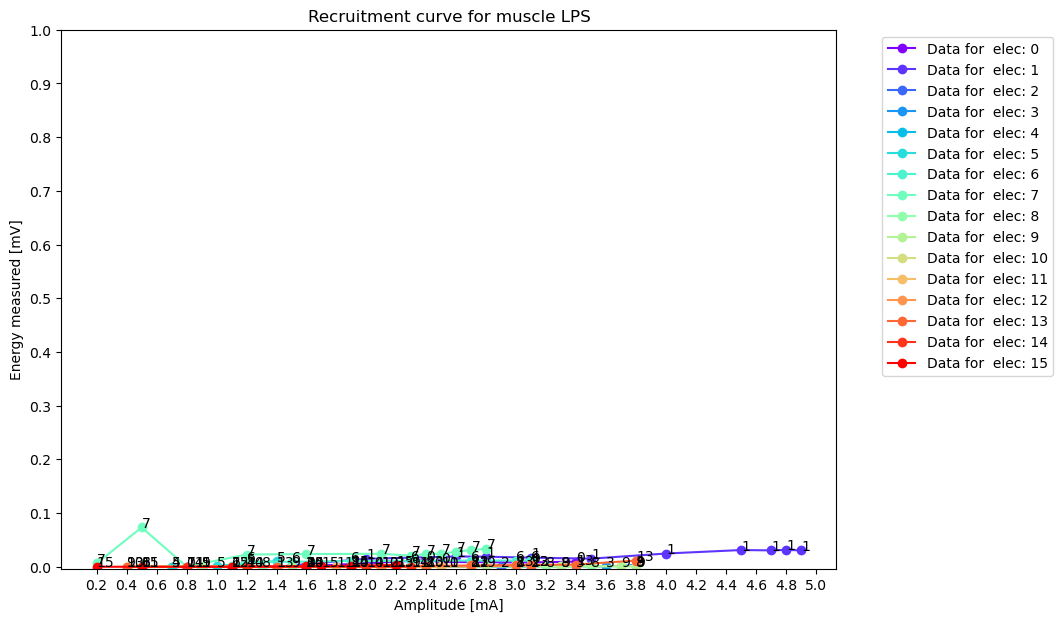

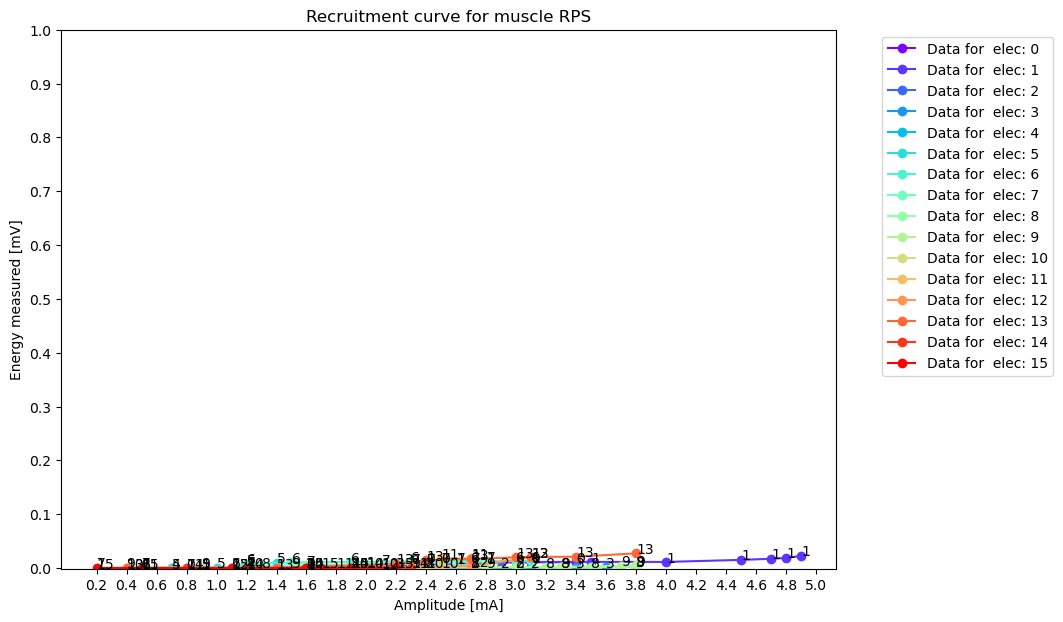

In [38]:
# Make a table for every muscle and different elecs

colors = cm.rainbow(np.linspace(0, 1, len(mt_electrodes)))
label=mt_electrodes["elec_name"]

for muscle_i in range (len(mt_muscles)):
# for elec_i in range (0, len(mt_electrodes)):
  fig, ax = plt.subplots(figsize=(10,7))
  for elec_i in range (0, len(mt_electrodes)):
  # for muscle_i in range (len(mt_muscles)):

    # Define variables for plotting
    x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
    y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
  
    
    # Remove nan values for the text index
    x_without_nan=np.array(x)
    x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
    y_without_nan=np.array(y)
    y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

    # Plot the data points
    plt.plot(x_without_nan, y_without_nan, 'o-', c=colors[elec_i],  label= f"Data for  elec: {mt_electrodes['elec_name'][elec_i]}") 
    
    # Add text descripiton to the points for visibility
    for index in range (len(x_without_nan)):
        ax.text(x_without_nan[index], y_without_nan[index], label[elec_i], size=10) 
    
  
    # Set label and scale
    ax.set_xlabel("Amplitude [mA]")
    ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

 # Plotting settings
  ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.set_title(f"Recruitment curve for muscle {mt_muscles['muscle_name'][muscle_i]}")

  # save plots
  if save_flag:
      data_file = "muscle"+"_"+str(muscle_i)+"_"+"recruitment_curve"+'.png'
      data_file_path = os.path.join(save_folder,data_file)
      plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
  plt.show()

### with interpol1

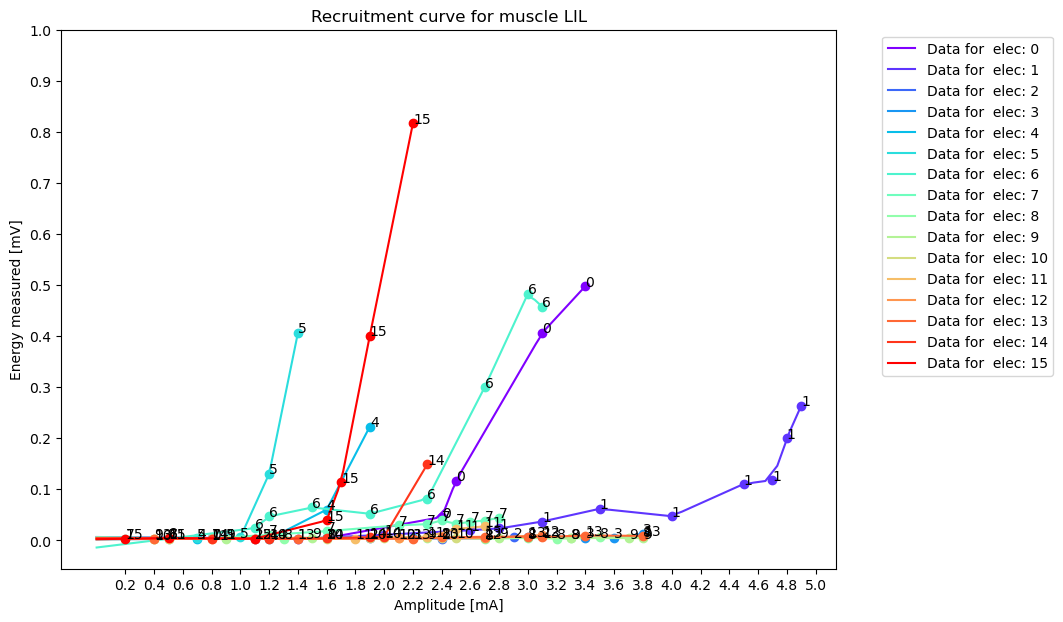

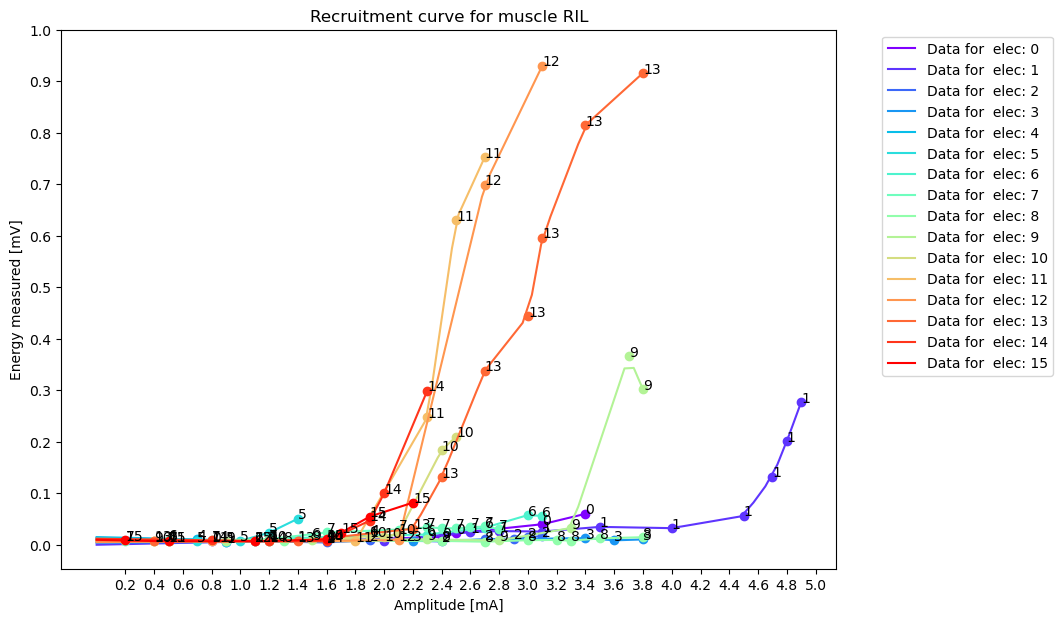

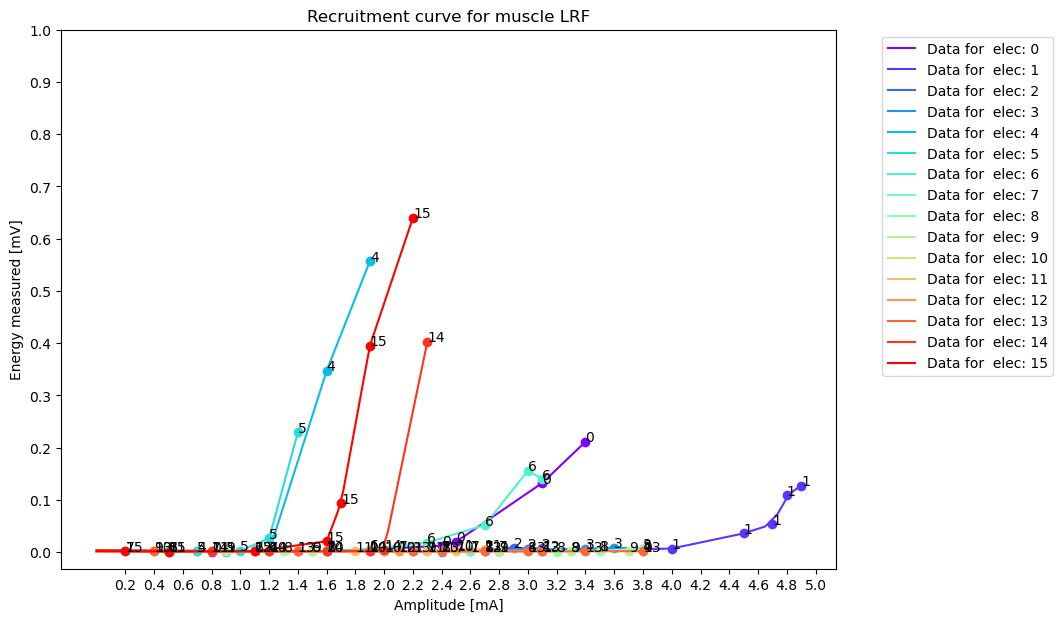

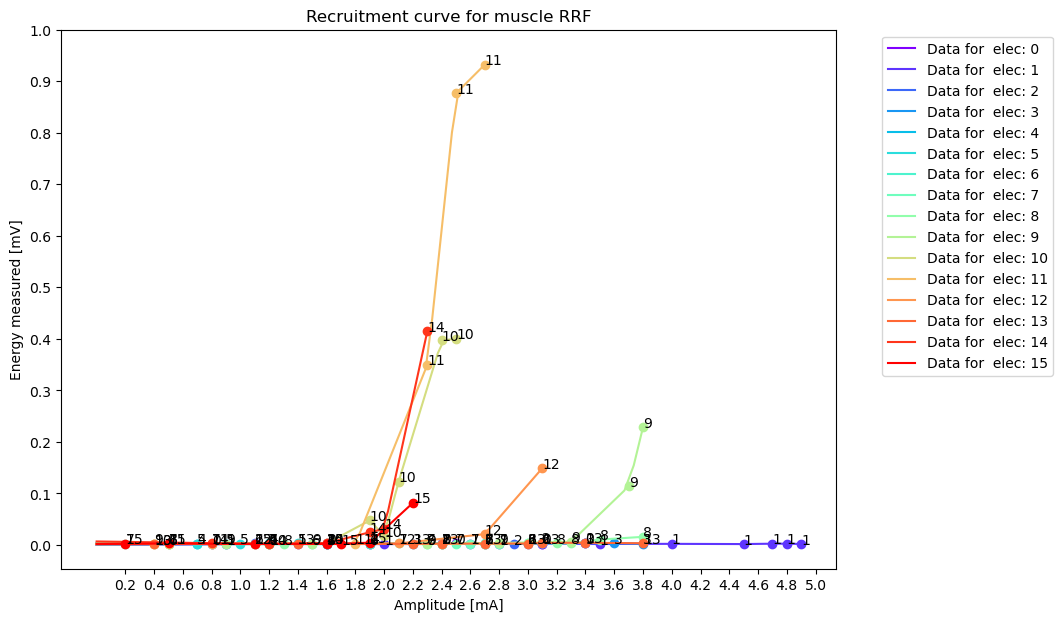

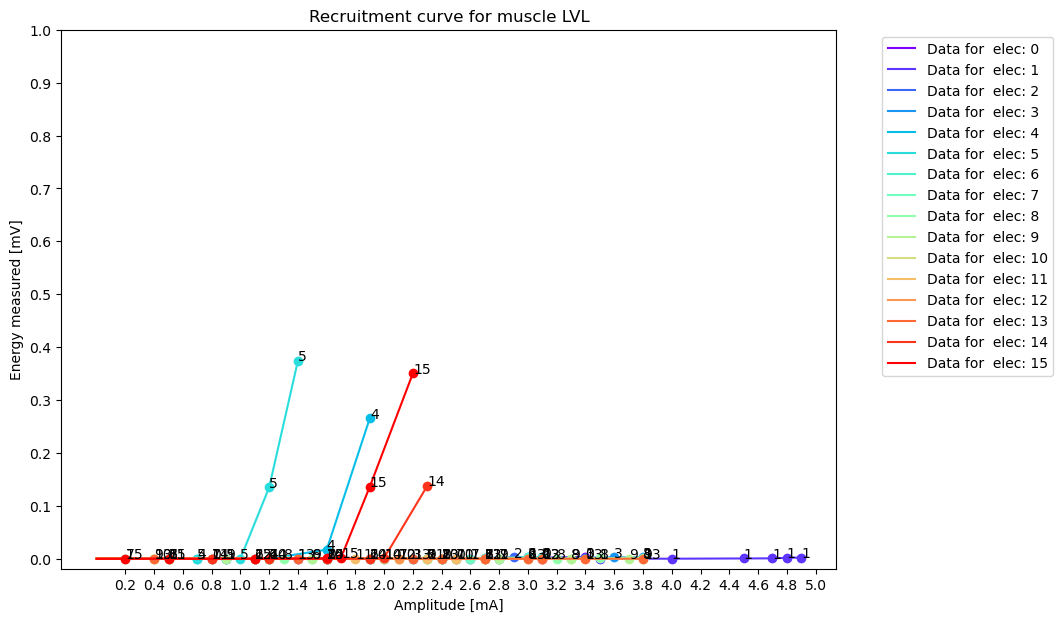

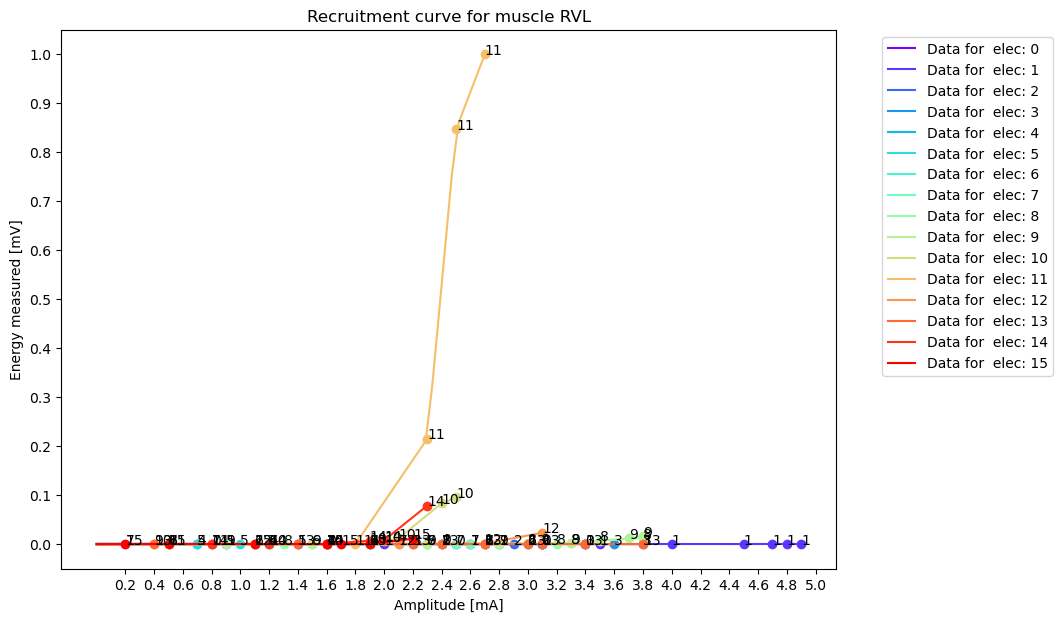

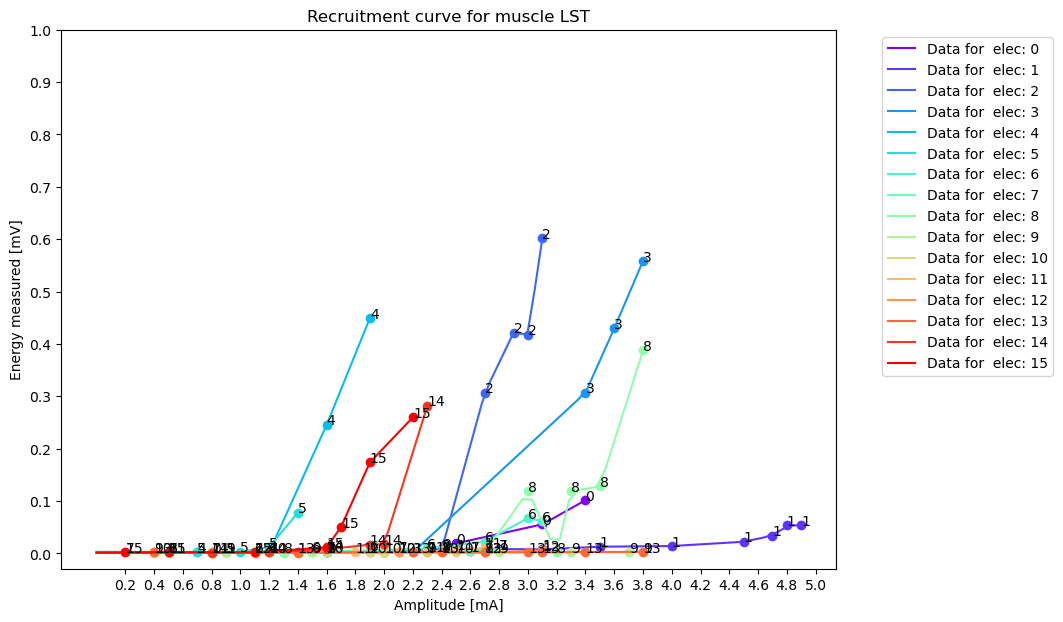

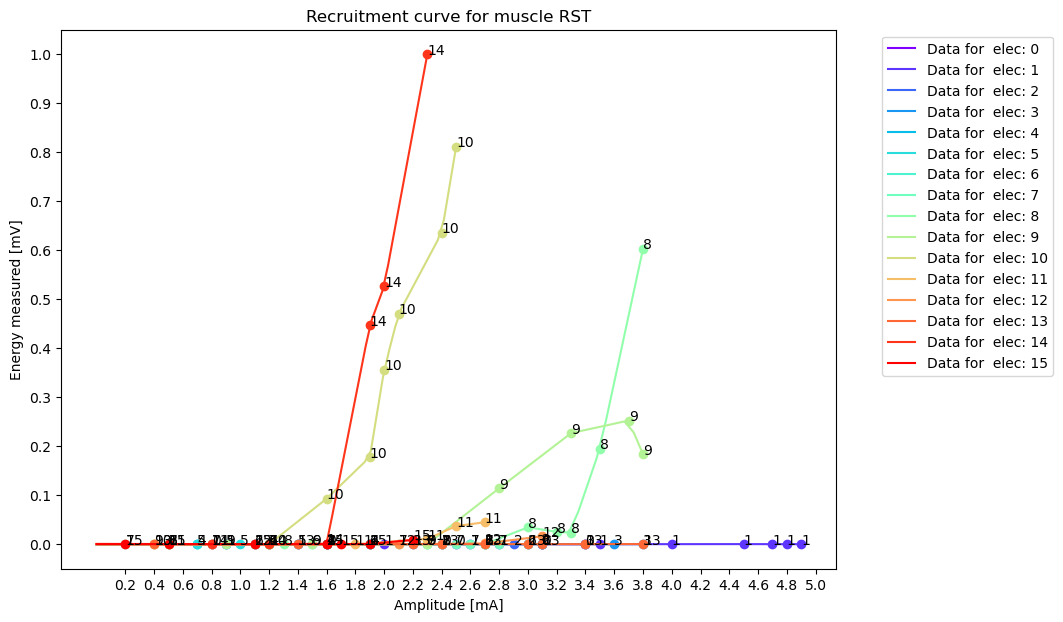

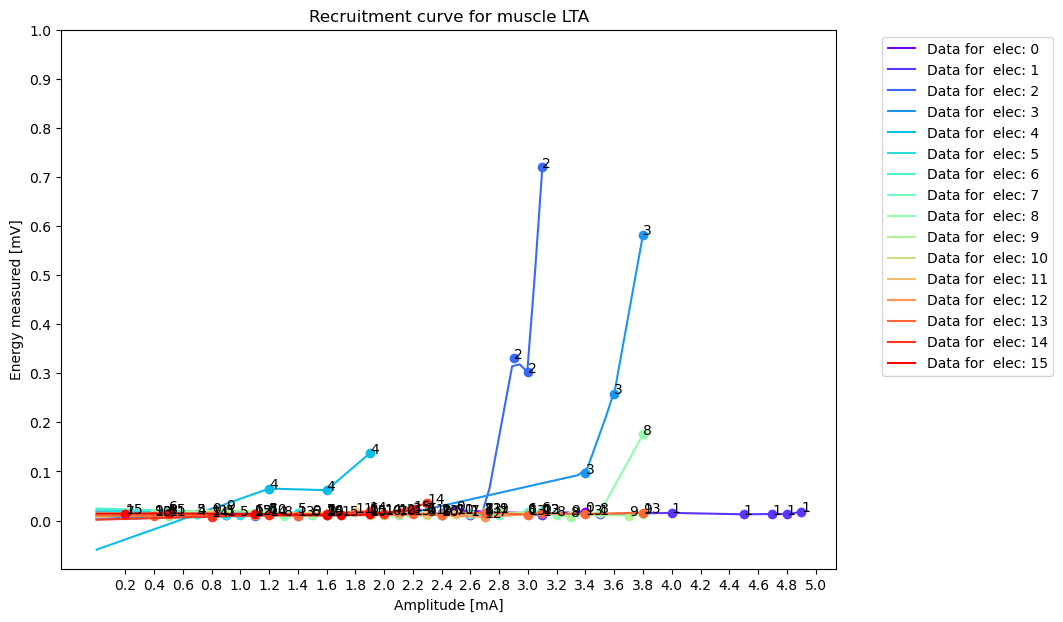

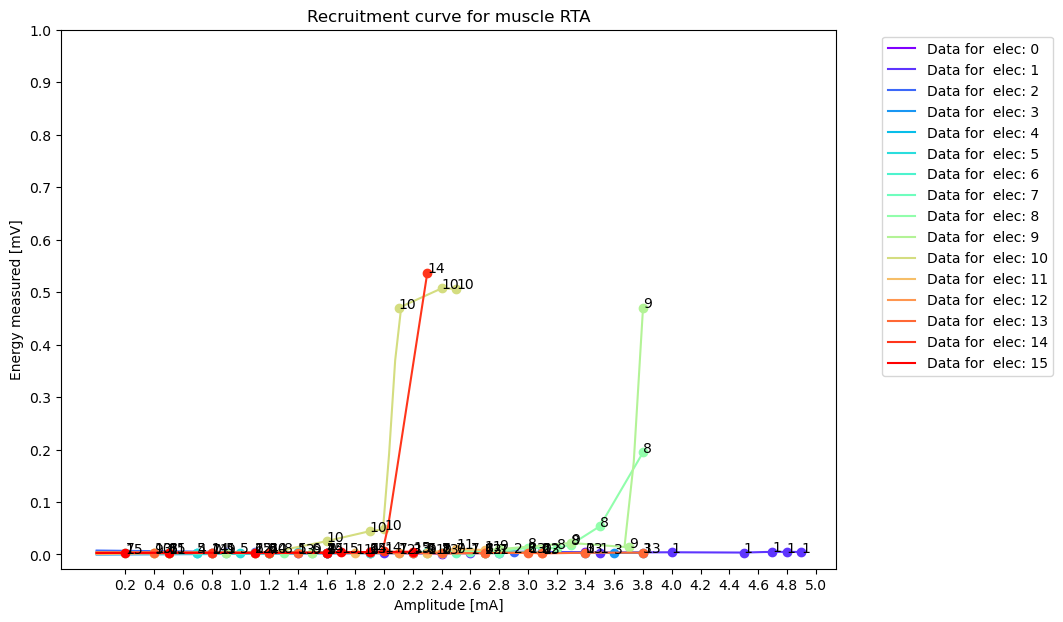

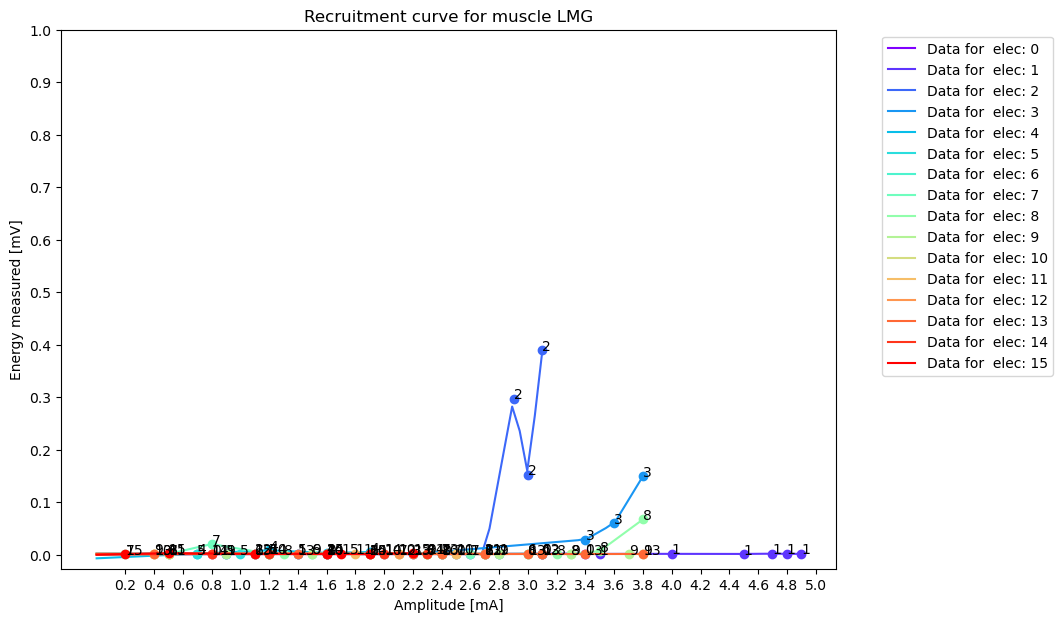

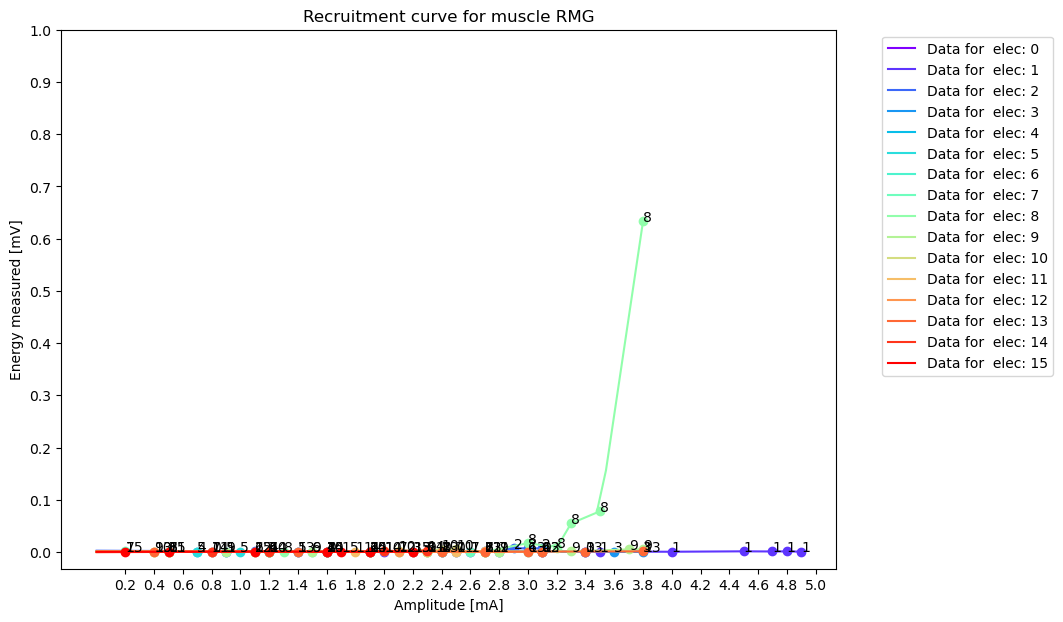

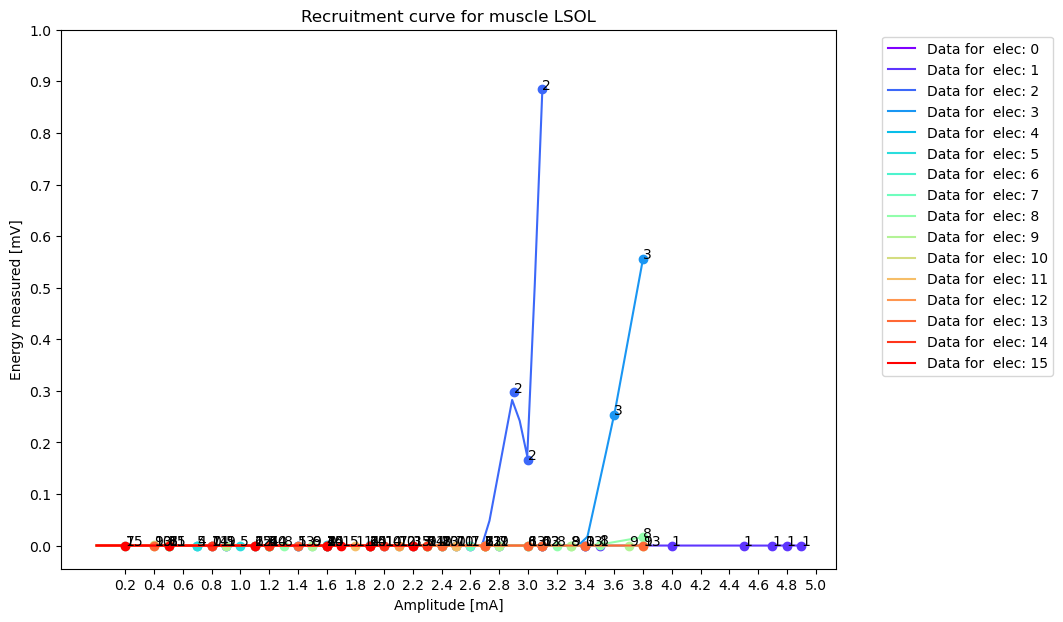

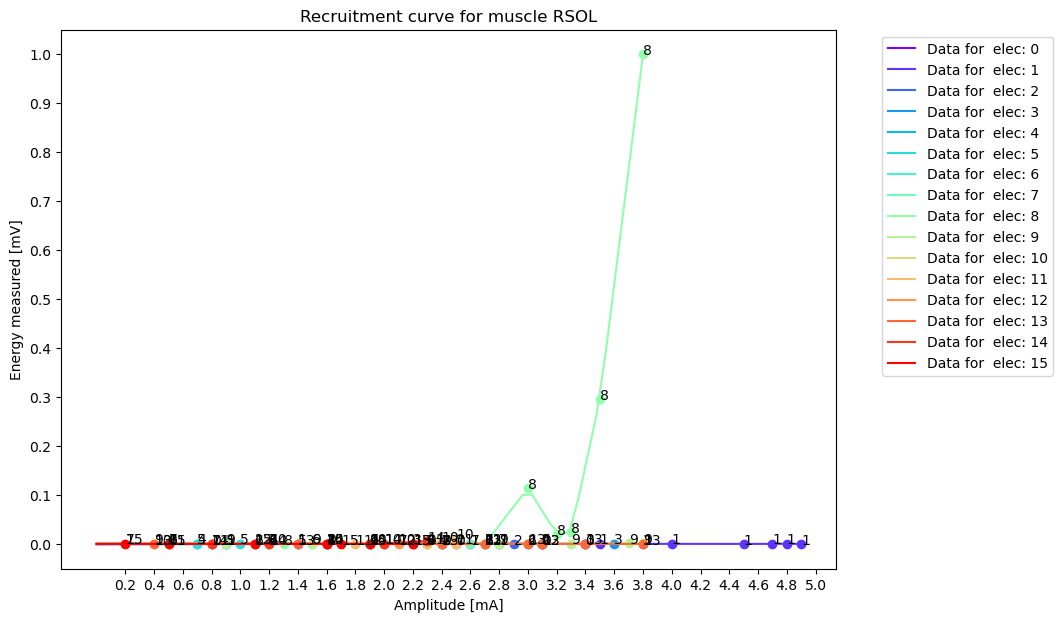

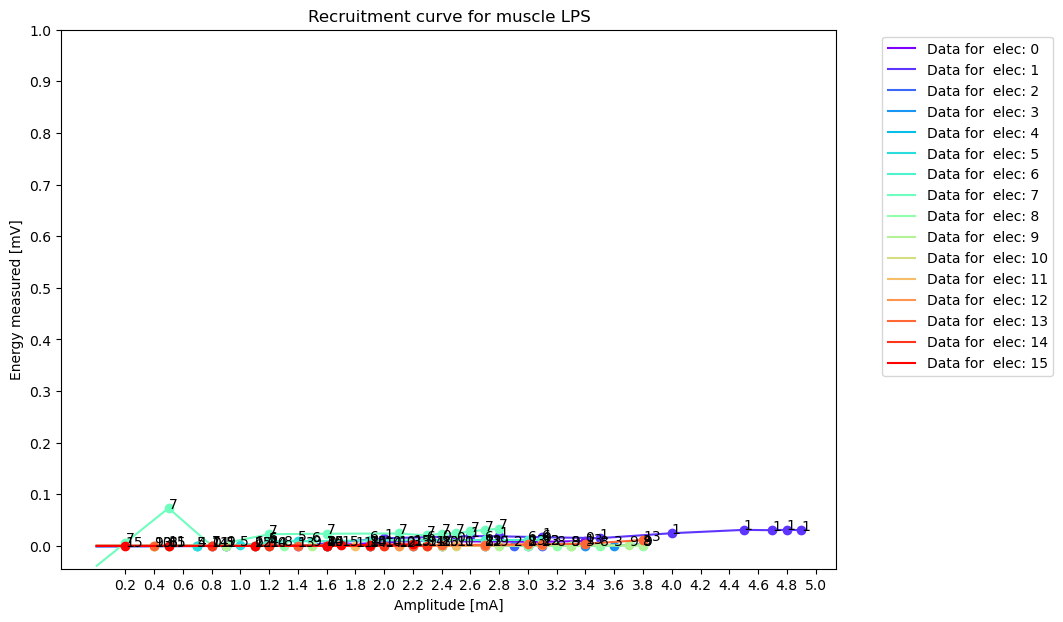

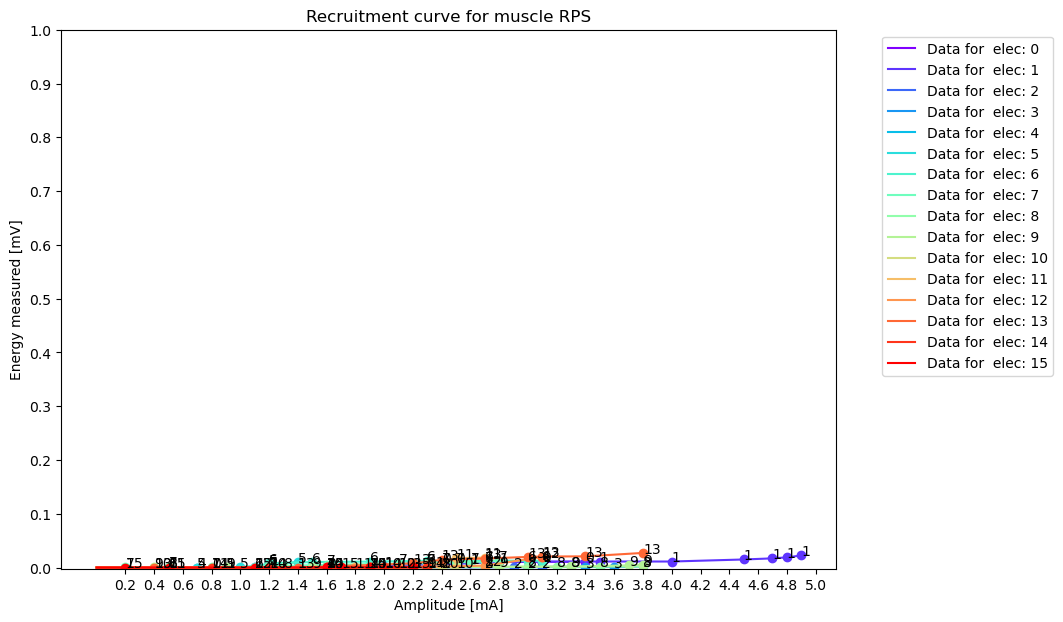

In [ ]:
# Make a table for every muscle and different elecs

colors = cm.rainbow(np.linspace(0, 1, len(mt_electrodes)))
label=mt_electrodes["elec_name"]

for muscle_i in range (len(mt_muscles)):
# for elec_i in range (0, len(mt_electrodes)):
  fig, ax = plt.subplots(figsize=(10,7))
  for elec_i in range (0, len(mt_electrodes)):
  # for muscle_i in range (len(mt_muscles)):

    # Define variables for plotting
    x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
    y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
    f = interp1d(x, y, axis=0,  fill_value="extrapolate")
    f2 = interp1d(x, y, kind='cubic',axis=0,  fill_value="extrapolate")
    xnew = np.linspace(0, np.nanmax(amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]), num=60, endpoint=True)
    
    # Remove nan values for the text index
    x_without_nan=np.array(x)
    x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
    y_without_nan=np.array(y)
    y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

    # Plot the data points
    plt.plot(x, y, 'o', c=colors[elec_i]) 
    
    # Add text descripiton to the points for visibility
    for index in range (len(x_without_nan)):
        ax.text(x_without_nan[index], y_without_nan[index], label[elec_i], size=10) 
    
    # Plot the interpolation of data points to see trend
    plt.plot(xnew, f(xnew), '-', c=colors[elec_i], label= f"Data for  elec: {mt_electrodes['elec_name'][elec_i]}")
    
    # Set label and scale
    ax.set_xlabel("Amplitude [mA]")
    # ax.set_xticks(ticks=list(unique_amplitudes["amplitudes"]))
    ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

 # Plotting settings
  ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.set_title(f"Recruitment curve for muscle {mt_muscles['muscle_name'][muscle_i]}")

  # save plots
  if save_flag:
      data_file = "muscle"+"_"+str(muscle_i)+"_"+"recruitment_curve"+'.png'
      data_file_path = os.path.join(save_folder,data_file)
      plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
  plt.show()

# Calculate Integral

Don't do this for now, evt. later to check results
We use time series for now (not peak to peak values)

In [ ]:

# y are tiem_points of one time series , take abs value
y=abs(filtered_data_to_tensor[7, 0, 4 ,0, :])
x= np.arange(0, len(y))
scipy.integrate.simps(y, x, dx=1, axis=- 1, even='avg')


605.7151865034102

# Heat map

Brainstorming on selectivity target. Since not same Amplitudes used for every electrodes (with some elctrodes one stopped way earlier with stimulation) it's hard to compare the different data.


## Normalise by amplitude


    * normalise by amplitude:
        * peak to peak values: max output(max activation) / input(amp) at max activation
        * integral: output int /input (amp) bim max 

### Heat map all muscles

In [ ]:
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
      
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data[muscle_i][elec_i]=max_value_normalised


In [26]:
def heatmap(data, row_labels=mt_muscles["muscle_name"], col_labels=mt_electrodes["elec_name"], ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels: muscles
        A list or array of length M with the labels for the rows.
    col_labels: electrodes
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


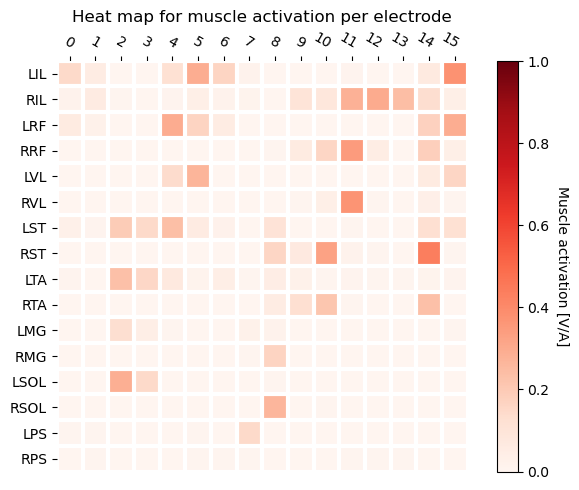

In [27]:
import matplotlib.colors
fig, ax = plt.subplots()

im, cbar = heatmap(data=data, cmap='Reds', cbarlabel="Muscle activation [V/A]", vmin=0, vmax=1)
# texts = annotate_heatmap(im)

fig.tight_layout()
ax.set_title('Heat map for muscle activation per electrode')
plt.show()

### Heat map indiviudal muscles, paddle lead arrangement

Saving the heat maps

In [18]:
save_flag=1
# subject_plots_folder_name=subject+'_plots'
data_folder = "/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/Recruitment_curve"
save_folder = os.path.join(data_folder,"heat_maps")
os.makedirs(save_folder,exist_ok=True)

Normalise data for heat map

In [20]:
### Calculate max value for heat map for each combination ### 
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
      
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data[muscle_i][elec_i]=max_value_normalised



Building heat map

In [53]:
df2.loc["a"]

0    1
1    2
2    3
Name: a, dtype: int64

In [48]:

df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),index=['a', 'b', 'c'])
# [[xvalues], [yvalues], [data], index=["x_value", "y_value", "data"]]



                0         1         2         3         4         5         6
x_value  4.000000  4.000000  4.000000  4.000000  4.000000  4.000000  4.000000
y_value  3.000000  4.000000  5.000000  6.000000  7.000000  8.000000  9.000000
data     0.004624  0.004624  0.004624  0.004624  0.004624  0.004624  0.004624


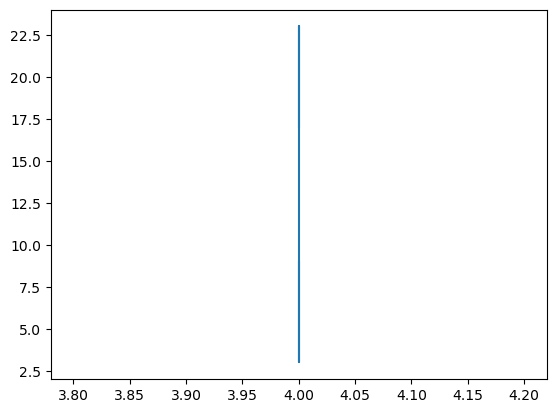

In [63]:
## create a df


n=14+3
row=4
e=0
df2 = pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6], [data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["x_value", "y_value", "data"])

n=0+3
row=4
e=1
df3=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6], [data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["x_value", "y_value", "data"])

result=pd.concat([df2, df3], axis=1)
print(df3)
plt.plot(result.loc["x_value"], result.loc["y_value"])



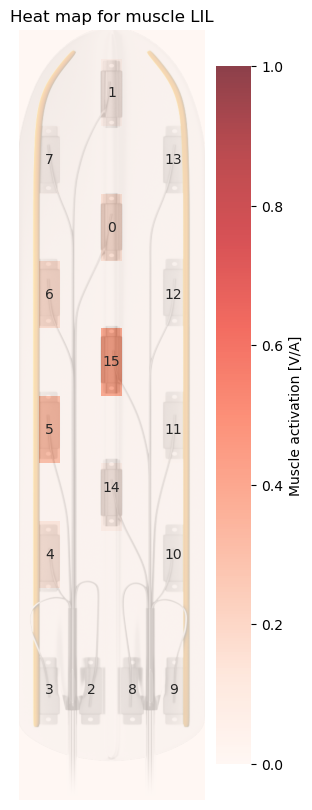

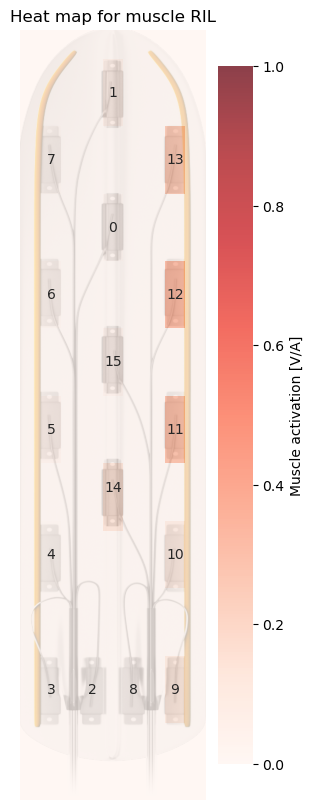

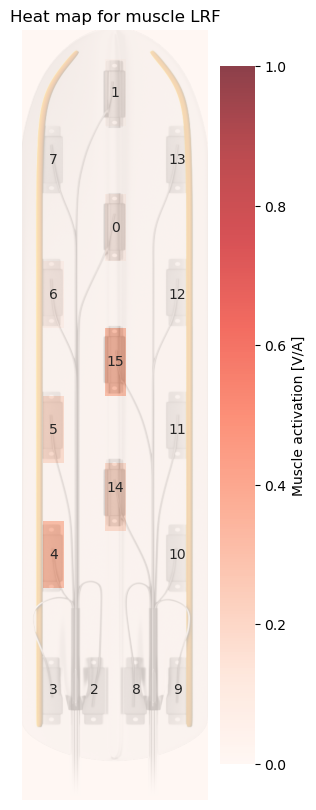

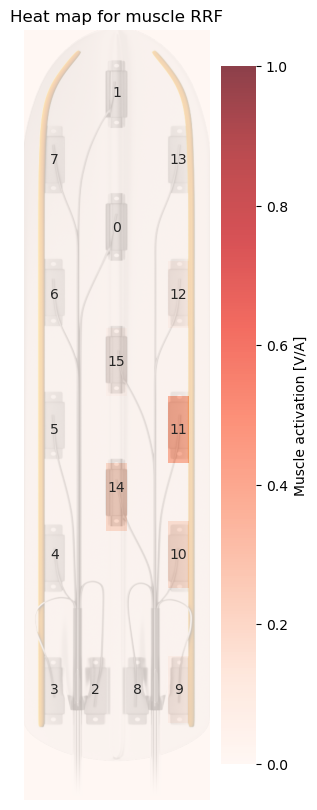

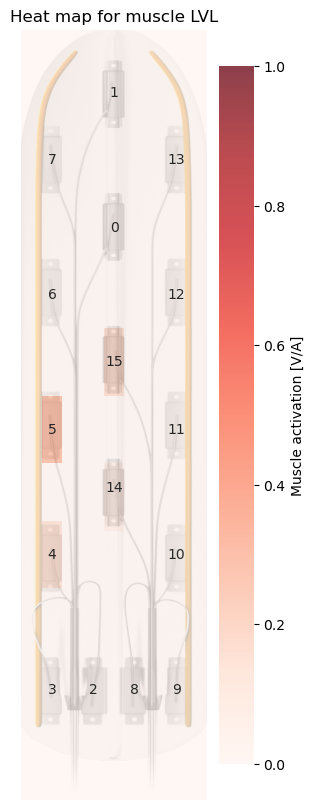

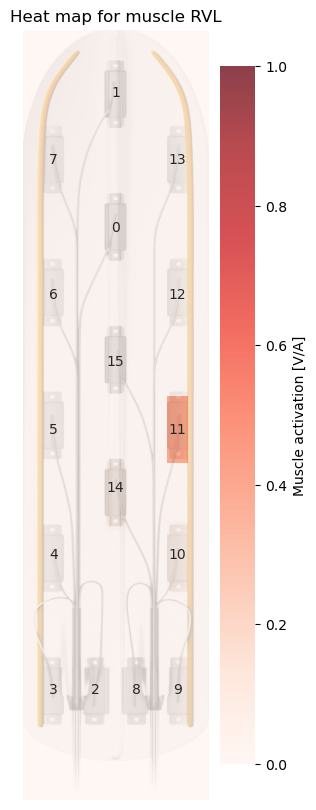

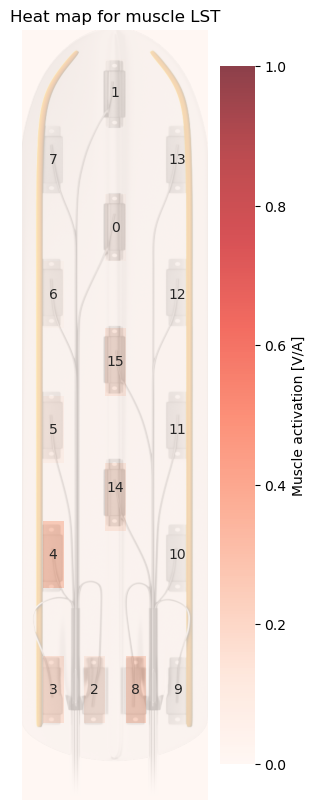

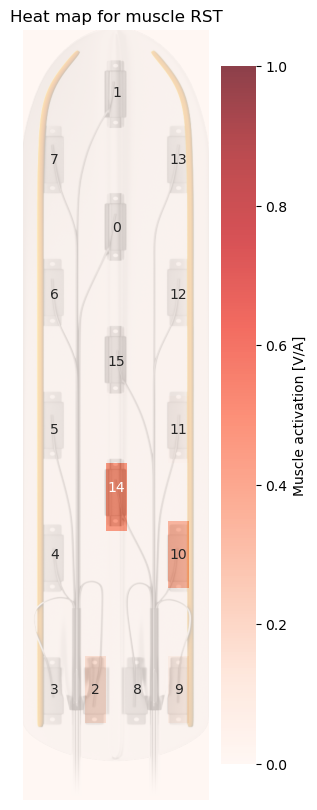

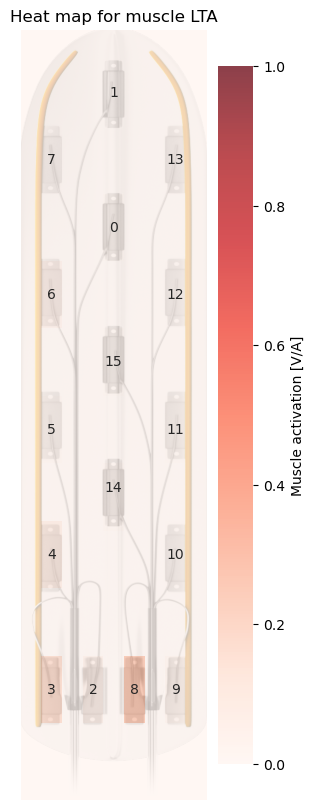

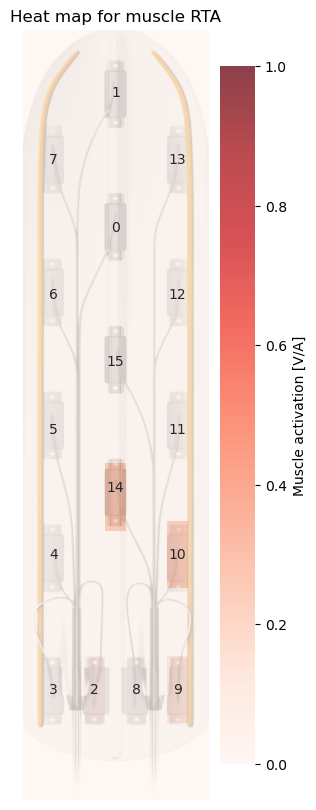

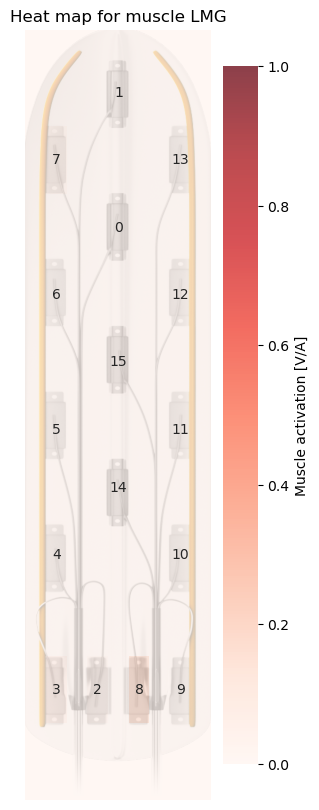

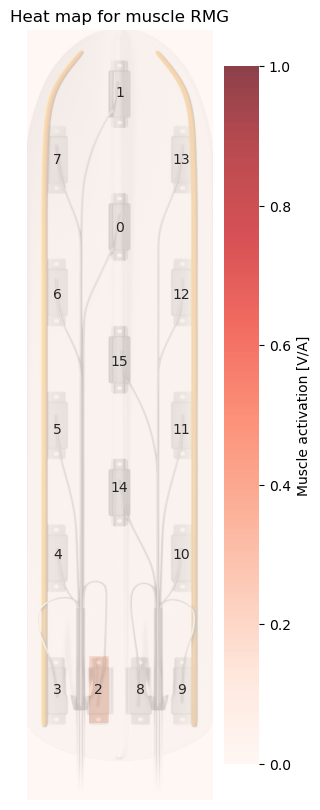

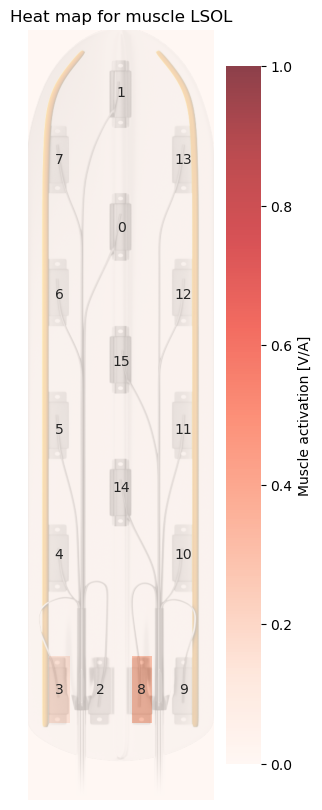

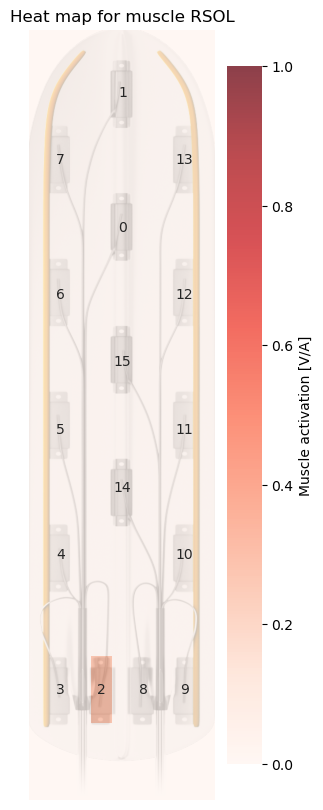

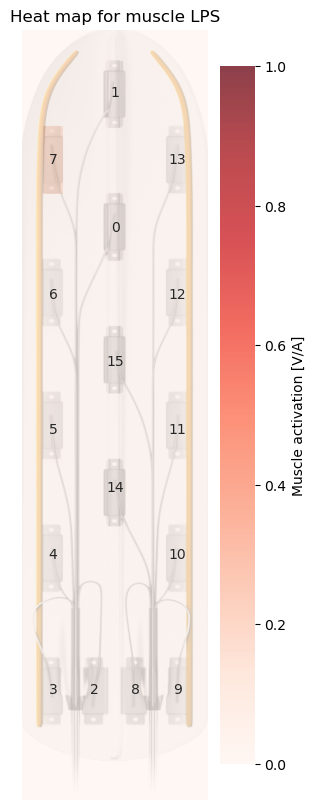

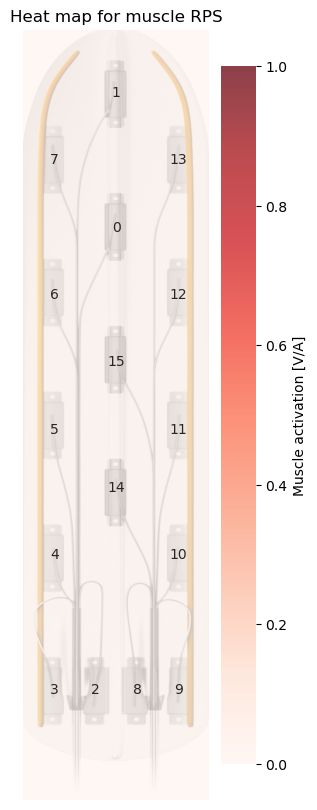

In [39]:
#correcting 


# get the map image as an array so we can plot it 
import matplotlib.image as mpimg 
map_img = mpimg.imread('/Users/nealarohner/Desktop/Projectome_Finder/code/Refrences/lead_original.png') 

paddle_lead =np.zeros(80* 9).reshape((80,9))
  


text = np.array([
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','1', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '7','', '','', '', '', '13', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','0', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '6','', '','', '', '', '12', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','15', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '5','', '','', '', '', '11', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','14', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '4','', '','', '', '', '10', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '3','', '2','', '8', '', '9', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', '']])
  
for muscle_i in range(len(mt_muscles)):
    # creating subplot
    fig, ax = plt.subplots(figsize=(3,10)) 
   
    
    ## Define electrode placements

    ##elec 0
    n=14+3
    row=4
    e=0
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    
    ## elec 1
    n=0+3
    row=4
    e=1
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    

    ## elec 2
    n=55+10
    row=5
    e=2
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]





    ## elec 3
    n=55+10
    row=1
    e=3
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]


    ## elec 4
    n=41+10
    row=1
    e=4
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    
    ## elec 5 ##
    n=28+10
    row=1
    e=5
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    

    ## elec 6 ##
    n=14+10
    row=1
    e=6
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    



    
    ## elec 7 
    n=0+10
    row=1
    e=7
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    



    ## elec 8
    n=55+10
    row=3
    e=8
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]

    ## elec 9
    n=55+10
    row=7
    e=9

    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]

    ## elec 10
    n=41+10
    row=7
    e=10
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]

    ## elec 11
    n=28+10
    row=7
    e=11
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]

    ## elec 12
    n=14+10
    row=7
    e=12
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    
    ## elec 13
    n=0+10
    row=7
    e=13
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]
    



    ##elec 14
    n=42+3
    row=4
    e=14
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]

    ##elec 15
    n=28+3
    row=4
    e=15
    paddle_lead[0+n][row] =data[muscle_i][e]
    paddle_lead[1+n][row] =data[muscle_i][e]
    paddle_lead[2+n][row] =data[muscle_i][e]
    paddle_lead[3+n][row] =data[muscle_i][e]
    paddle_lead[4+n][row] =data[muscle_i][e]
    paddle_lead[5+n][row] =data[muscle_i][e]
    paddle_lead[6+n][row] =data[muscle_i][e]



    im=paddle_lead
    plt.title(f"Heat map for muscle {mt_muscles['muscle_name'][muscle_i]}")

        
    # drawing heatmap on current axes
    hmax= sns.heatmap(data=paddle_lead, annot=text, fmt="", cmap='Reds', cbar_kws={'label': "Muscle activation [V/A]"},
         yticklabels=False, xticklabels=False, vmin=0, vmax=1, 
         alpha = 0.75, # whole heatmap is translucent
        zorder = 2,
            )


    hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent =hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap




    # if save_flag:
    #     data_file = mt_muscles['muscle_name'][muscle_i]+"_"+"heat_map"+'.png'
    #     data_file_path = os.path.join(save_folder,data_file)
    #     plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')

    from matplotlib.pyplot import show 
    show()            
   

### GUI for heat maps and presentation

### Heat map with interpolation

In [5]:
### Calculate max value for heat map for each combination ### 
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
      
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data[muscle_i][elec_i]=max_value_normalised



# Fitting Sigmoid curve to data

A possible plan could then be to take a look at the parameters of sigmoid after the fit (and the goodness of the fit) and use go from those to describe the data.
Then comparing these to the ones obtained with the simulations.

Version, assuming max value is max data value

opt:[0.49645561 3.49352357 2.57205074 0.01336421]
pcov:[[ 7.39141632e-04  1.04417296e-03 -7.19778168e-03 -1.65345728e-04]
 [ 1.04417296e-03  7.61741131e-03 -1.00878387e-02  2.65195941e-04]
 [-7.19778168e-03 -1.00878387e-02  1.55450996e-01  1.64932353e-03]
 [-1.65345728e-04  2.65195941e-04  1.64932353e-03  1.34459141e-04]]


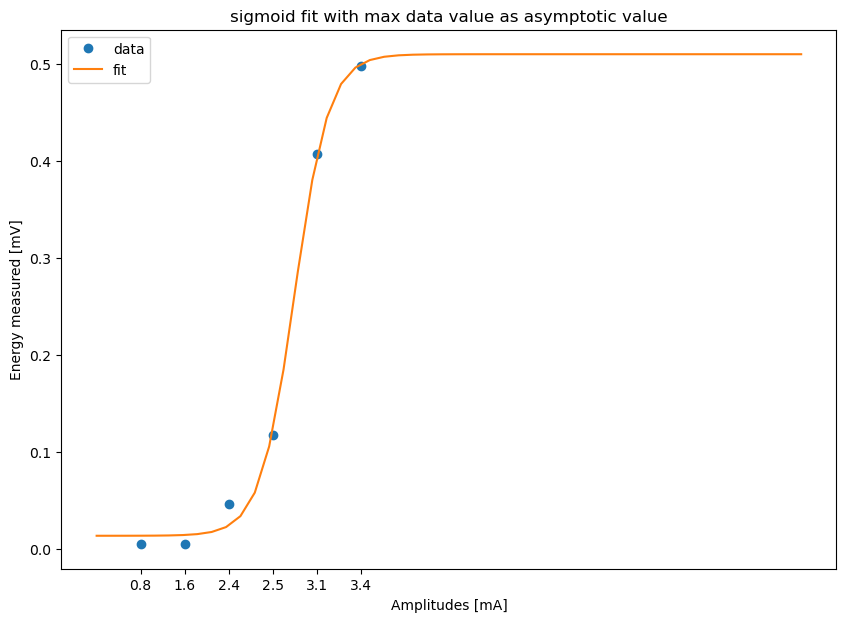

In [ ]:
## SErgio version

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is responsible for scaling the output range from [0,1] to [0,L]
# b adds bias to the output and changes its range from [0,L] to [b,L+b]
# k is responsible for scaling the input, which remains in (-inf,inf)
# x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

muscle_i=0
elec_i=0
## assuming
peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0])
peak_peak_values=peak_peak_values.dropna()
peak_peak_values=np.array(peak_peak_values[0])
xdata=np.arange(0, len(peak_peak_values))
ydata=peak_peak_values


# for the plot amplitudes
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])


## Initial guess for the parameters ##

# maximum=1 # The maximum asymptotic intensity.
# midpoint=np.max(xdata) # The time point at which the sigmoidal curve reaches half of its maximum intensity.
# slope =0.5 # The slope of the curve at the midpoint.
# # p0 = [maximum, midpoint,slope] # this is an mandatory initial guess
p0 =[max(ydata), np.median(xdata),1,min(ydata)]
# p0 =[1, np.median(xdata),1,min(ydata)]

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')
print(f"opt:{popt}")
print(f"pcov:{pcov}")
x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Energy measured [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title("sigmoid fit with max data value as asymptotic value")
pylab.plot(xdata, ydata, 'o', label='data')

# set ticks

ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(x,y, label='fit')
plt.legend()



Version assuming max value is at higher amplitude

[4.81608384 0.92039473]


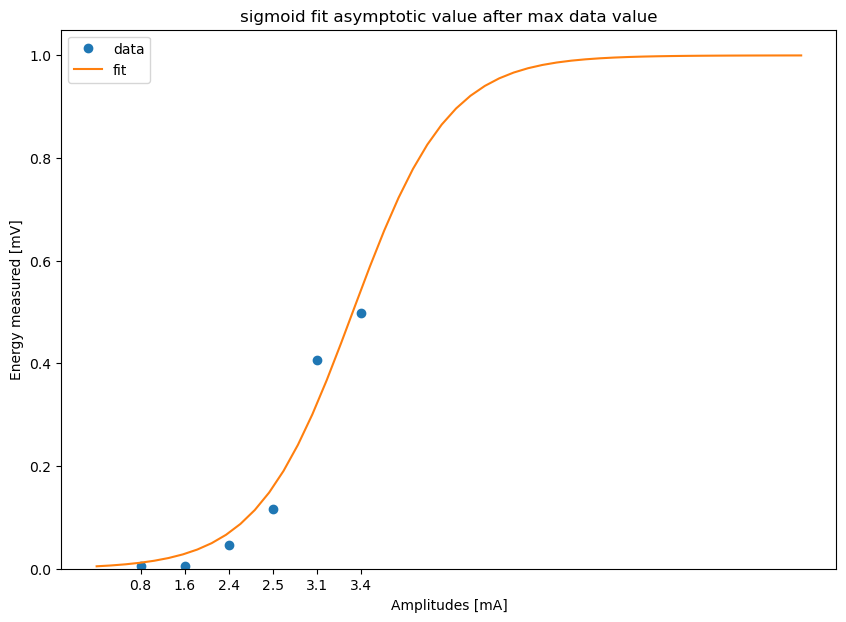

In [ ]:
# Neala version 




import numpy as np
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0])
peak_peak_values=peak_peak_values.dropna()
peak_peak_values=np.array(peak_peak_values[0])
xdata=np.arange(0, len(peak_peak_values))
ydata=peak_peak_values

# for the plot amplitudes
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Energy measured [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title("sigmoid fit asymptotic value after max data value")
ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()